## Import all relevant libraries

In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt
import clarabel
from scipy.special import gamma as Gamma
from scipy.special import gammaincc as Gammaincc
from matplotlib.ticker import FuncFormatter
from scipy import sparse
import pandas as pd
from scipy.special import kn

## Define all electron distribution functions

In [2]:
def f_th(gamma, lam):
    '''
    This is the Maxwell-Jüttner electron distribution function.
    
    gamma = lorentz factor (usually a list)
    lam = 1/theta (where theta is the dimensionaless temperature (usually a list)
    '''
    return ((gamma*np.sqrt(gamma**2 -1))/(2*lam**-3))*np.exp(-gamma*lam)

# Define the target electron distribution f(gamma)(this case the kappa distr. function)
def kappa_dist(gamma, k, w_k):
    """
    This is the kappa distribution function given in your paper. 

    k = kappa(float)
    w_k = width, a parameter of this specific funcion (float)
    gamma = gamma (usually a list)
    theta = theta (dimensionless temperature, usually a list)
    """
    base_func = (((k-2)*(k-1))/((2*k**2)*(w_k**3)))*gamma*np.sqrt(gamma**2 -1)*(((gamma)/(k*w_k))+1)**(-k-1)
    
    return base_func

def kappa_dist_cutoff(gamma,lam_min, k, w_k):
    """
    This is the kappa distribution function given in your paper. 

    k = kappa(float)
    w_k = width, a parameter of this specific funcion (float)
    gamma = gamma (usually a list)
    theta = theta (dimensionless temperature, usually a list)
    lam_min_wk = the cutoff parameter (float)
    """
    lam_min_wk = lam_min*w_k*k
    base_func = ((Gammaincc(1+k, lam_min_wk*((((gamma)/(k*w_k))+1))))/(2*k**3*w_k**3*Gammaincc(k-2, lam_min_wk))) \
                *gamma*np.sqrt(gamma**2 -1)*(((gamma)/(k*w_k))+1)**(-k-1)

    return base_func


## A couple of Maxwell-Juettner distribution functions

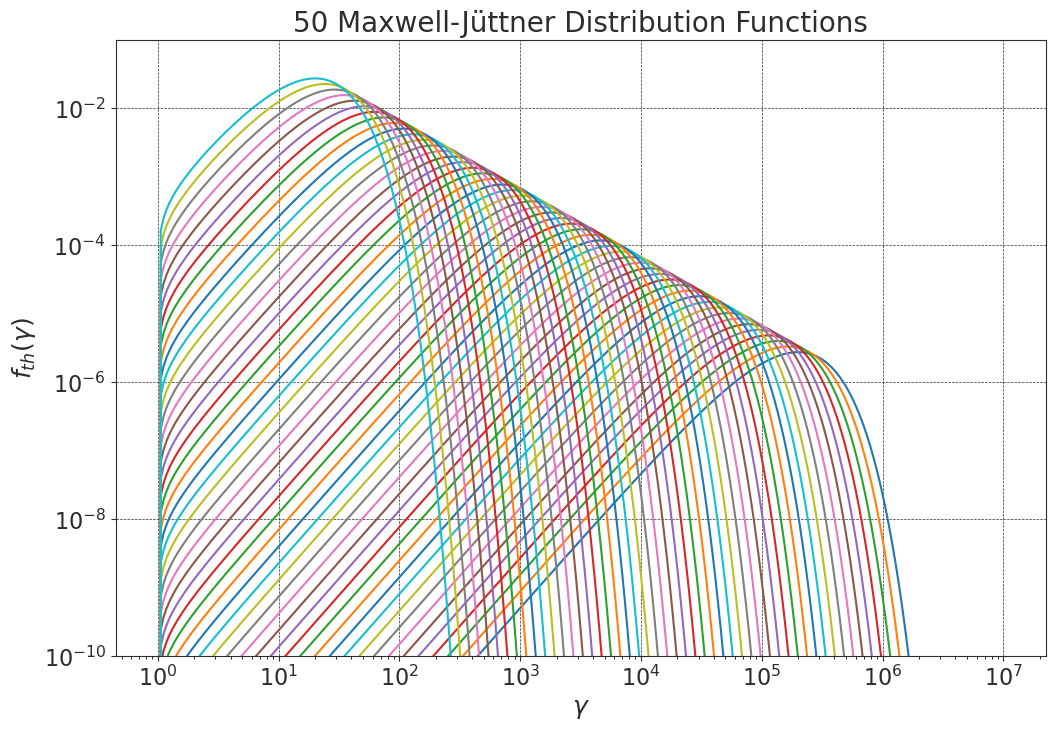

In [3]:
figure, ax = plt.subplots(figsize = (12,8))

"""Set function parameters"""

# Set number of functions
N = 50

# Set lambda values used in MJ function
lam = np.logspace(-5, -1, N)

# Set gamma values used in MJ function
gamma = np.logspace(0,7, 300)

# For loop to plot all N MJ functions
for i in range(N):
    f_i = f_th(gamma, lam[i])
    ax.loglog(gamma, f_th(gamma, lam[i]), label = f'$log(\lambda) = {np.log10(lam[i])}$')
    

"""Set plot layout options """    
ax.grid()

ax.set_facecolor('white')  # Background

# Customize the grid
ax.grid(color='#2c2c2c', linestyle='--', linewidth=0.5)
ax.spines['top'].set_color('#2c2c2c')    # Set the top spine color
ax.spines['bottom'].set_color('#2c2c2c')  # Set the bottom spine color
ax.spines['left'].set_color('#2c2c2c')  # Set the left spine color
ax.spines['right'].set_color('#2c2c2c') # Set the right spine color

ax.set_title(f"{N} Maxwell-Jüttner Distribution Functions", fontsize=20, color='#2c2c2c')  # Font size and color
ax.set_ylabel("$f_{th}(\\gamma)$", fontsize=18, color='#2c2c2c')  # Font size and color
ax.set_xlabel("$\\gamma$", fontsize=18, color='#2c2c2c')  # Font size and color

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=16, colors='#2c2c2c')  # Adjust tick label font size and color

ax.set_ylim(10**-10, 10**-1)


plt.show()

## A couple kappa distribution functions

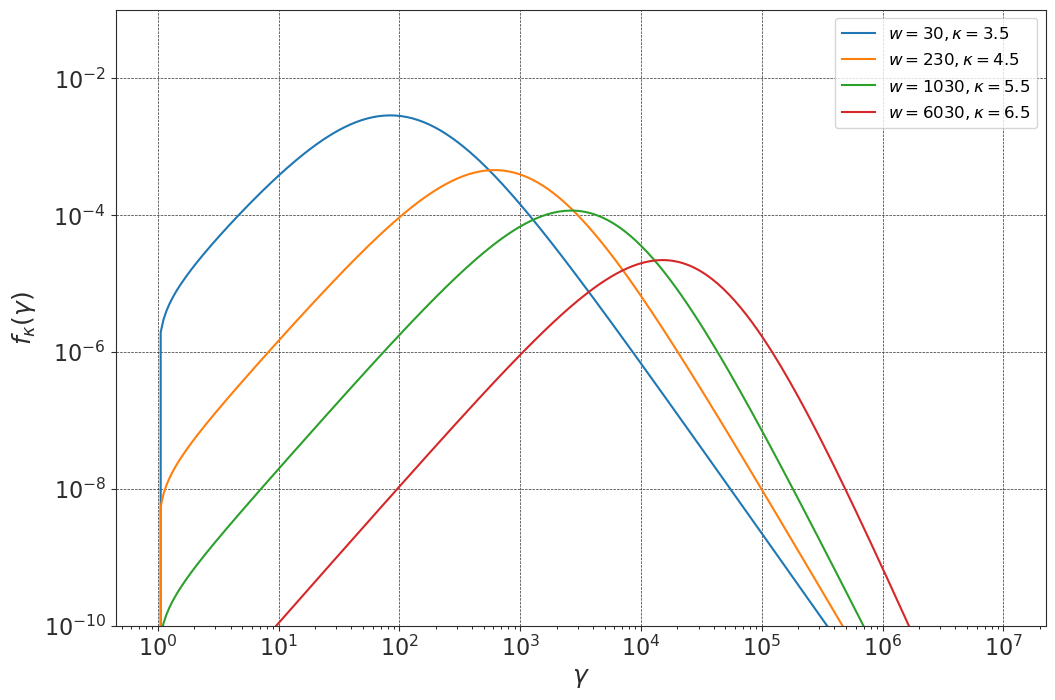

In [4]:
figure, ax = plt.subplots(figsize = (12,8))

"""Set function parameters"""

# Set number of functions
N = 4

# Different kappa parameters for in the kappa function
w_k = [30, 230, 1030, 6030]

# Gamma values for the kappa function
gamma = np.logspace(0,7, 300)

# For loop of all N kappa functions
for i in range(N):
    f_i = kappa_dist(gamma = gamma, k = 3.5+0.5*i, w_k = w_k[i])
    ax.loglog(gamma, f_i, label = f'$w = {w_k[i]}, \kappa = {3.5+i}$')

"""Set plot layout options """
ax.grid()
ax.legend(fontsize=12)


# Customize the grid
ax.grid(color='#2c2c2c', linestyle='--', linewidth=0.5)
ax.spines['top'].set_color('#2c2c2c')    # Set the top spine color
ax.spines['bottom'].set_color('#2c2c2c')  # Set the bottom spine color
ax.spines['left'].set_color('#2c2c2c')  # Set the left spine color
ax.spines['right'].set_color('#2c2c2c') # Set the right spine color

ax.set_ylabel("$f_{\kappa}(\\gamma)$", fontsize=18, color='#2c2c2c')  # Font size and color
ax.set_xlabel("$\\gamma$", fontsize=18, color='#2c2c2c')  # Font size and color

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=16, colors='#2c2c2c')  # Adjust tick label font size and color

ax.set_ylim(10**-10, 10**-1)


plt.show()

## Approximating Kappa electron distr. function

Elapsed time to calculate matrix A for N=20: 0.010782 seconds
Elapsed time for b_j for N=20: 0.000358 seconds
Elapsed time to calculate weights for N=20: 0.000967 seconds
The median error for N=20 is: 7.746427484627584
The max error for N=20 is: 599.5549686858392
The min error for N=20 is: 0.021957387037880752

Elapsed time to calculate matrix A for N=50: 0.064527 seconds
Elapsed time for b_j for N=50: 0.000770 seconds
Elapsed time to calculate weights for N=50: 0.005982 seconds
The median error for N=50 is: 8.480584003539757e-06
The max error for N=50 is: 0.38678151839099256
The min error for N=50 is: 4.0419300540758935e-09

Elapsed time to calculate matrix A for N=50: 0.072348 seconds
Elapsed time for b_j for N=50: 0.000858 seconds
Elapsed time to calculate weights for N=50: 0.006008 seconds
The median error for N=50 is: 0.0007442301798602825
The max error for N=50 is: 100.0
The min error for N=50 is: 1.337113357550644e-07



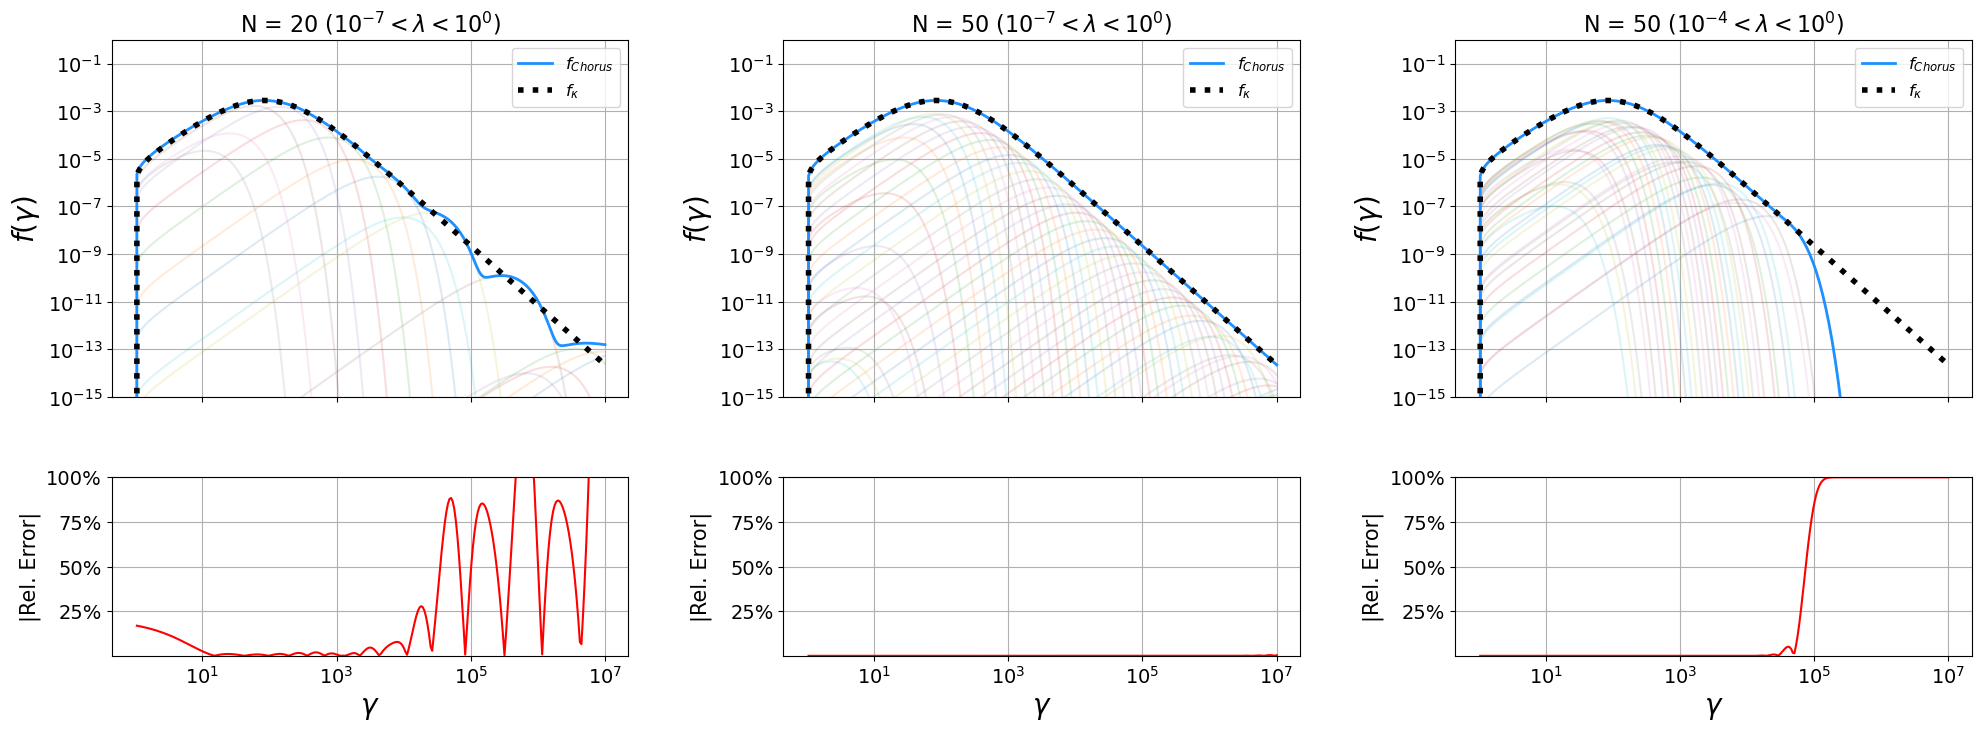

In [5]:
# Create a 2x3 grid of subplots
figure, ax = plt.subplots(2, 3, figsize=(24, 8), sharex=True, 
                          gridspec_kw={'height_ratios': [2, 1], 'hspace': 0.3, 'wspace': 0.3})

# Function to compute and plot results for a given N
def plot_1kappa(N, column_index, lam_min):
    # Start the timer
    start_time = time.perf_counter()

    # Set lambda values used in MJ function
    lam = np.logspace(lam_min, 0, N)

    # Gamma values for the kappa and MJ functions
    gamma = np.logspace(0, 7, 300)

    # dgamma necessary followed from the derivation in ISE in the thesis
    dgam = np.diff(gamma)
    dgam = np.append(dgam, dgam[-1])

    # Calculate the matrix A
    A = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            product = f_th(gamma, lam[i]) * f_th(gamma, lam[j]) * dgam
            A[i, j] = np.sum(product)

    # End the timer
    end_time = time.perf_counter()
    print(f"Elapsed time to calculate matrix A for N={N}: {end_time - start_time:.6f} seconds")

    # Start the timer for b_j
    start_time = time.perf_counter()

    # Compute vector b_j
    w_k = 30
    k = 3.5
    f_kappa = kappa_dist(gamma=gamma, k=k, w_k=w_k)
    f_data = f_kappa

    b = np.zeros(N)
    for i in range(N):
        pro = f_th(gamma, lam[i]) * f_data * dgam
        b[i] = np.sum(pro)

    # End the timer
    end_time = time.perf_counter()
    print(f"Elapsed time for b_j for N={N}: {end_time - start_time:.6f} seconds")

    # Start the timer for Clarabel solver
    start_time = time.perf_counter()

    # Clarabel parameters
    P = sparse.csc_matrix(A)
    q = -b
    G = sparse.csc_matrix(-np.identity(N))
    h = np.zeros(N)
    cones = [clarabel.NonnegativeConeT(N)]
    settings = clarabel.DefaultSettings()
    settings.tol_gap_abs = 0
    settings.tol_gap_rel = 0
    settings.max_iter = 100
    settings.verbose = False

    solver = clarabel.DefaultSolver(P=P, q=q, A=G, b=h, cones=cones, settings=settings)
    solution = solver.solve()
    weights = np.array(solution.x)

    # End the timer
    end_time = time.perf_counter()
    print(f"Elapsed time to calculate weights for N={N}: {end_time - start_time:.6f} seconds")

    # Compute the approximations
    f_appr = np.zeros_like(gamma)
    for i, w in zip(range(N), weights):
        f_i = w * f_th(gamma, lam[i])
        f_appr += f_i
        ax[0, column_index].loglog(gamma, f_i, alpha=0.15)

    # Plot the results
    ax[0, column_index].loglog(gamma, f_appr, label='$f_{Chorus}$', linewidth = 2, color = 'dodgerblue')
    ax[0, column_index].loglog(gamma, f_data, label='$f_{\kappa}$', linestyle='dotted', linewidth = 4, color = 'black')
    ax[0, column_index].set_ylim(10**-15, 1)
    ax[0, column_index].set_ylabel("$f(\gamma)$", fontsize=20)
    ax[0, column_index].grid()
    ax[0, column_index].legend(fontsize=12)
    ax[0, column_index].tick_params(axis='both', which='major', labelsize=14)
    # Relative error
    nzmask = f_data != 0
    rel_error = np.abs((f_data[nzmask]) - f_appr[nzmask]) / (f_data[nzmask]) * 100
    ax[1, column_index].plot(gamma[nzmask], rel_error, color='red')
    ax[1, column_index].set_xscale('log')
    ax[1, column_index].set_ylim(10**-5, 10*10**1)
    ax[1, column_index].yaxis.set_major_formatter(FuncFormatter(lambda rel_error, _: f'{rel_error:.0f}%'))
    ax[1, column_index].yaxis.tick_left()
    ax[1, column_index].set_ylabel("|Rel. Error|", fontsize=15)
    ax[1, column_index].set_xlabel("$\gamma$", fontsize=20)
    ax[1, column_index].set_facecolor('white')
    ax[1, column_index].grid()
    ax[1, column_index].tick_params(axis='both', which='major', labelsize=14)
    
    print(f'The median error for N={N} is: {np.median(rel_error)}')
    print(f'The max error for N={N} is: {np.max(rel_error)}')
    print(f'The min error for N={N} is: {np.min(rel_error)}\n')

# Compute and plot results for N = 50 (left column)
plot_1kappa(N=20, column_index=0, lam_min=-7)

# Compute and plot results for N = 20 (right column)
plot_1kappa(N=50, column_index=1, lam_min=-7)

# Compute and plot results for N = 20 (right column)
plot_1kappa(N=50, column_index=2, lam_min=-4)


# Set plot titles
ax[0, 2].set_title("N = 50 ($10^{-4} < \lambda < 10^0$)", fontsize=16)
ax[0, 1].set_title("N = 50 ($10^{-7} < \lambda < 10^0$)", fontsize=16)
ax[0, 0].set_title("N = 20 ($10^{-7} < \lambda < 10^0$)", fontsize=16)

# Adjust layout and show the plots
figure.patch.set_facecolor('white')

plt.show()


## Approximating 3 Kappa electron distr. function

Elapsed time to calculate matrix A for N=20: 0.010613 seconds
Elapsed time for b_j for N=20: 0.000372 seconds
Elapsed time to calculate weights for N=20: 0.001496 seconds
The median error for N=20 is: 1.784509819898002
The max error for N=20 is: 529.0683486034224
The min error for N=20 is: 0.005741403210192212

Elapsed time to calculate matrix A for N=50: 0.065774 seconds
Elapsed time for b_j for N=50: 0.000815 seconds
Elapsed time to calculate weights for N=50: 0.006183 seconds
The median error for N=50 is: 1.88174786731281e-06
The max error for N=50 is: 1.1894113304970102
The min error for N=50 is: 2.9805425514240013e-10

Elapsed time to calculate matrix A for N=50: 0.072702 seconds
Elapsed time for b_j for N=50: 0.000911 seconds
Elapsed time to calculate weights for N=50: 0.007386 seconds
The median error for N=50 is: 0.013083394343301935
The max error for N=50 is: 100.0
The min error for N=50 is: 8.0649948059204e-08



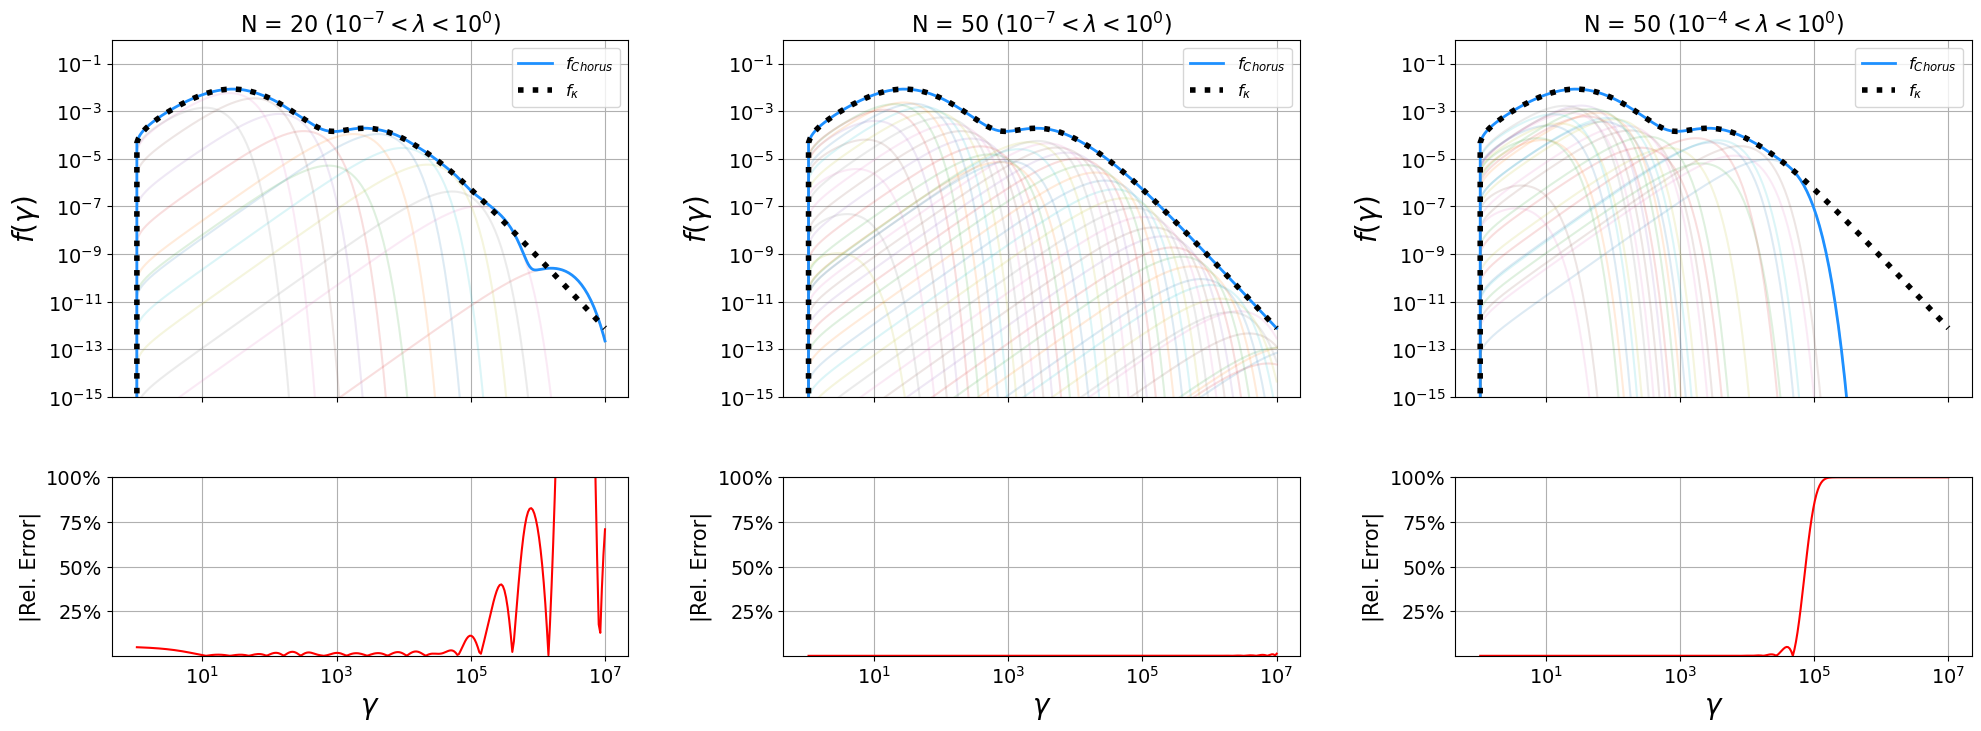

In [6]:
# Create a 2x3 grid of subplots
figure, ax = plt.subplots(2, 3, figsize=(24, 8), sharex=True, 
                          gridspec_kw={'height_ratios': [2, 1], 'hspace': 0.3, 'wspace': 0.3})

# Function to compute and plot results for a given N
def plot_3kappa(N, column_index, lam_min):
    # Start the timer
    start_time = time.perf_counter()

    # Set lambda values used in MJ function
    lam = np.logspace(lam_min, 0, N)

    # Gamma values for the kappa and MJ functions
    gamma = np.logspace(0, 7, 300)

    # dgamma necessary followed from the derivation in ISE in the thesis
    dgam = np.diff(gamma)
    dgam = np.append(dgam, dgam[-1])

    # Calculate the matrix A
    A = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            product = f_th(gamma, lam[i]) * f_th(gamma, lam[j]) * dgam
            A[i, j] = np.sum(product)

    # End the timer
    end_time = time.perf_counter()
    print(f"Elapsed time to calculate matrix A for N={N}: {end_time - start_time:.6f} seconds")

    # Start the timer for b_j
    start_time = time.perf_counter()

    # Compute vector b_j

    # Compute all three kappa distribution function
    f_kappa = kappa_dist(gamma = gamma, k=3.5, w_k=10)
    f_test = kappa_dist(gamma = gamma, k=6, w_k=1000)
    f_test2 = kappa_dist(gamma = gamma, k=4, w_k=2000)

    # Sum the kappa functions
    f_data = f_kappa + f_test + f_test2

    b = np.zeros(N)
    for i in range(N):
        pro = f_th(gamma, lam[i]) * f_data * dgam
        b[i] = np.sum(pro)

    # End the timer
    end_time = time.perf_counter()
    print(f"Elapsed time for b_j for N={N}: {end_time - start_time:.6f} seconds")

    # Start the timer for Clarabel solver
    start_time = time.perf_counter()

    # Clarabel parameters
    P = sparse.csc_matrix(A)
    q = -b
    G = sparse.csc_matrix(-np.identity(N))
    h = np.zeros(N)
    cones = [clarabel.NonnegativeConeT(N)]
    settings = clarabel.DefaultSettings()
    settings.tol_gap_abs = 0
    settings.tol_gap_rel = 0
    settings.max_iter = 100
    settings.verbose = False

    solver = clarabel.DefaultSolver(P=P, q=q, A=G, b=h, cones=cones, settings=settings)
    solution = solver.solve()
    weights = np.array(solution.x)

    # End the timer
    end_time = time.perf_counter()
    print(f"Elapsed time to calculate weights for N={N}: {end_time - start_time:.6f} seconds")

    # Compute the approximations
    f_appr = np.zeros_like(gamma)
    for i, w in zip(range(N), weights):
        f_i = w * f_th(gamma, lam[i])
        f_appr += f_i
        ax[0, column_index].loglog(gamma, f_i, alpha=0.15)

    # Plot the results
    ax[0, column_index].loglog(gamma, f_appr, label='$f_{Chorus}$', linewidth = 2, color = 'dodgerblue')
    ax[0, column_index].loglog(gamma, f_data, label='$f_{\kappa}$', linestyle='dotted', linewidth = 4, color = 'black')
    ax[0, column_index].set_ylim(10**-15, 1)
    ax[0, column_index].set_ylabel("$f(\gamma)$", fontsize=20)
    ax[0, column_index].grid()
    ax[0, column_index].legend(fontsize=12)
    ax[0, column_index].tick_params(axis='both', which='major', labelsize=14)
    # Relative error
    nzmask = f_data != 0
    rel_error = np.abs((f_data[nzmask]) - f_appr[nzmask]) / (f_data[nzmask]) * 100
    ax[1, column_index].plot(gamma[nzmask], rel_error, color='red')
    ax[1, column_index].set_xscale('log')
    ax[1, column_index].set_ylim(10**-5, 10*10**1)
    ax[1, column_index].yaxis.set_major_formatter(FuncFormatter(lambda rel_error, _: f'{rel_error:.0f}%'))
    ax[1, column_index].yaxis.tick_left()
    ax[1, column_index].set_ylabel("|Rel. Error|", fontsize=15)
    ax[1, column_index].set_xlabel("$\gamma$", fontsize=20)
    ax[1, column_index].set_facecolor('white')
    ax[1, column_index].grid()
    ax[1, column_index].tick_params(axis='both', which='major', labelsize=14)
    
    print(f'The median error for N={N} is: {np.median(rel_error)}')
    print(f'The max error for N={N} is: {np.max(rel_error)}')
    print(f'The min error for N={N} is: {np.min(rel_error)}\n')

# Compute and plot results for N = 50 (left column)
plot_3kappa(N=20, column_index=0, lam_min=-7)

# Compute and plot results for N = 20 (right column)
plot_3kappa(N=50, column_index=1, lam_min=-7)

# Compute and plot results for N = 20 (right column)
plot_3kappa(N=50, column_index=2, lam_min=-4)


# Set plot titles
ax[0, 2].set_title("N = 50 ($10^{-4} < \lambda < 10^0$)", fontsize=16)
ax[0, 1].set_title("N = 50 ($10^{-7} < \lambda < 10^0$)", fontsize=16)
ax[0, 0].set_title("N = 20 ($10^{-7} < \lambda < 10^0$)", fontsize=16)

# Adjust layout and show the plots
figure.patch.set_facecolor('white')
plt.show()


## Comparing method to probability distribution F(lambda)

Elapsed time to calculate matrix A for N=20: 0.010415 seconds
Elapsed time for b_j for N=20: 0.000454 seconds
Elapsed time to calculate weights for N=20: 0.000729 seconds
The median difference between these two methods for N = 20: 98.36959709954105
Elapsed time to calculate matrix A for N=35: 0.031776 seconds
Elapsed time for b_j for N=35: 0.000559 seconds
Elapsed time to calculate weights for N=35: 0.001379 seconds
The median difference between these two methods for N = 35: 13.065450152532195
Elapsed time to calculate matrix A for N=50: 0.065295 seconds
Elapsed time for b_j for N=50: 0.000786 seconds
Elapsed time to calculate weights for N=50: 0.006015 seconds
The median difference between these two methods for N = 50: 0.8484800317795871


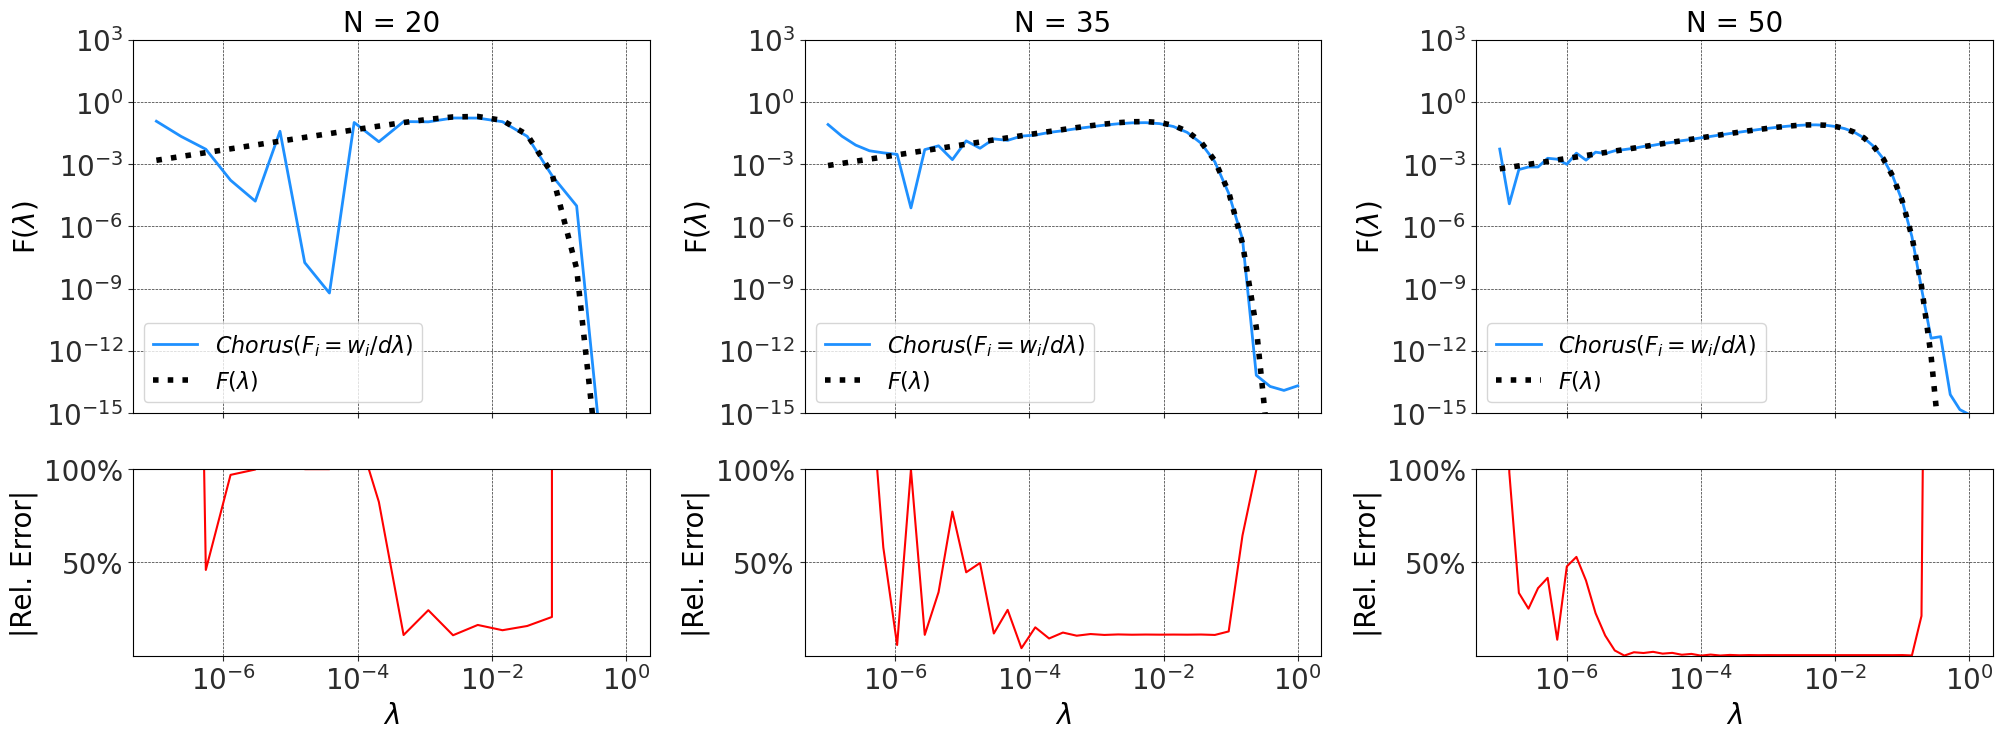

In [7]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.special import gamma as Gamma
from matplotlib.ticker import FuncFormatter
import clarabel
from scipy import sparse

# Create a 2x2 grid of subplots
figure, ax = plt.subplots(2, 3, figsize=(24, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1], 'hspace': 0.2, 'wspace': 0.3})

# Function to compute and plot results for a given N
def plot_results_bigF(N, column_index):
    # Start the timer
    start_time = time.perf_counter()

    # Set lambda values used in MJ function
    lam = np.logspace(-7, 0, N)

    # Gamma values for the kappa and MJ functions
    gamma = np.logspace(0, 7, 300)

    # dgamma necessary followed from the derivation in ISE in the thesis
    dgam = np.diff(gamma)
    dgam = np.append(dgam, dgam[-1])

    # Calculate the matrix A
    A = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            product = f_th(gamma, lam[i]) * f_th(gamma, lam[j]) * dgam
            A[i, j] = np.sum(product)

    # End the timer
    end_time = time.perf_counter()
    print(f"Elapsed time to calculate matrix A for N={N}: {end_time - start_time:.6f} seconds")

    # Start the timer for b_j
    start_time = time.perf_counter()

    # Compute vector b_j
    w_k = 30
    k = 3.5
    lam_min = 0
    f_kappa = kappa_dist(gamma=gamma, k=k, w_k=w_k)
    f_data = f_kappa

    b = np.zeros(N)
    for i in range(N):
        pro = f_th(gamma, lam[i]) * f_data * dgam
        b[i] = np.sum(pro)

    # End the timer
    end_time = time.perf_counter()
    print(f"Elapsed time for b_j for N={N}: {end_time - start_time:.6f} seconds")

    # Start the timer for Clarabel solver
    start_time = time.perf_counter()

    # Clarabel parameters
    P = sparse.csc_matrix(A)
    q = -b
    G = sparse.csc_matrix(-np.identity(N))
    h = np.zeros(N)
    cones = [clarabel.NonnegativeConeT(N)]
    settings = clarabel.DefaultSettings()
    settings.tol_gap_abs = 0
    settings.tol_gap_rel = 0
    settings.max_iter = 100
    settings.verbose = False

    solver = clarabel.DefaultSolver(P=P, q=q, A=G, b=h, cones=cones, settings=settings)
    solution = solver.solve()
    weights = np.array(solution.x)

    # End the timer
    end_time = time.perf_counter()
    print(f"Elapsed time to calculate weights for N={N}: {end_time - start_time:.6f} seconds")
    
    """Set parameters"""
    # Initiate F(lambda) values
    f_l_list = []
    for l in lam:
        k = 3.5
        q = 3 - k
        w_k = 30
        lambda_0 = (k * w_k)**(-1)
        F_lamb = (1 / (lambda_0 * Gamma(1 - q))) * np.exp(-l / lambda_0) * (lambda_0 / l)**q
        f_l_list.append(F_lamb)

    # Need dlambda to divide the weights by it for the comparison
    dlam = np.diff(lam)
    dlam = np.append(dlam, dlam[-1])

    # Normalize both F(lambda) and the weights
    F_lam = f_l_list
    F_norm = F_lam / np.sum(F_lam)

    we_lam = weights / dlam
    we_norm = we_lam / np.sum(we_lam)

    """Set plot parameters and compute plots"""
    ax[0, column_index].plot(lam, we_norm, label=r'$Chorus(F_i = w_i/d\lambda)$', linewidth = 2, color = 'dodgerblue')
    ax[0, column_index].plot(lam, F_norm, label=r'$F(\lambda)$', linestyle='dotted', linewidth = 4, color = 'black')

    ax[0, column_index].set_ylim(10**(-15), 10**3)
    ax[0, column_index].set_xscale('log')
    ax[0, column_index].set_yscale('log')
    ax[0, column_index].set_ylabel("F($\lambda$)", fontsize=20)
    ax[0, column_index].legend(fontsize=13)
    ax[0, column_index].grid(color='#2c2c2c', linestyle='--', linewidth=0.5)
    ax[0, column_index].tick_params(axis='both', which='major', labelsize=20, colors='#2c2c2c')
    ax[0, column_index].legend(fontsize=16, loc = 'lower left')
    """Compute relative error and plot it"""
    rel_error = np.abs((F_norm) - we_norm) / (F_norm) * 100
    ax[1, column_index].plot(lam, rel_error, color='red')
    ax[1, column_index].grid()

    ax[1, column_index].set_xscale('log')
    ax[1, column_index].set_ylim(10**-5,  10*10**1)

    ax[1, column_index].yaxis.set_major_formatter(FuncFormatter(lambda rel_error, _: f'{rel_error:.0f}%'))
    ax[1, column_index].set_xlabel(r'$\lambda$', fontsize=20)
    ax[1, column_index].set_ylabel(r'|Rel. Error|', fontsize=20)

    ax[1, column_index].grid(color='#2c2c2c', linestyle='--', linewidth=0.5)
    ax[1, column_index].tick_params(axis='both', which='major', labelsize=20, colors='#2c2c2c')
    print(f'The median difference between these two methods for N = {N}: {np.median(rel_error)}')

# Compute and plot results for N = 20 (left column)
plot_results_bigF(N=20, column_index=0)

# Compute and plot results for N = 50 (right column)
plot_results_bigF(N=35, column_index=1)

# Compute and plot results for N = 100 (right column)
plot_results_bigF(N=50, column_index=2)

# Set plot titles
ax[0, 0].set_title("N = 20", fontsize=20)
ax[0, 1].set_title("N = 35", fontsize=20)
ax[0, 2].set_title("N = 50", fontsize=20)

# Adjust layout and show the plots
figure.patch.set_facecolor('white')
plt.show()


## Emissivities and Absorptivities

In [8]:
"""
REFERENCE:

Thermal emissivity and absorptivity:
Leung, P. K., Gammie, C. F., and Noble, S. C. (2011). 
Numerical calculation of magnetobremsstrahlung emission and absorption coefficients. 
The Astrophysical Journal, 737(1):21.


Kappa emissivity and absorptivity:
Pandya, A., Zhang, Z., Chandra, M., and Gammie, C. F. (2016). 
Polarized synchrotron emissivities and absorptivities for relativistic thermal, power-law, and kappa distribution functions.
The Astrophysical Journal, 822(1):34.


Thermal rotativity:
Dexter, J. (2016). 
A public code for general relativistic, polarised radiative transfer around spinning black holes.
Monthly Notices of the Royal Astronomical Society, 462(1):115–136.
"""
def j_S_th(n_e, freq, freq_c, lam, angle, stokes_param):
    """
    Calculate the synchrotron emissivity of a thermal distribution function.
    
    n_e: the electron distribution function
    freq: frequency in Hz
    freq_c: cyclotron frequency in Hz
    Theta: Temperature dependent function
    Angle: the pitch angle
    Stokes_param: Choose Stokes parameter(I, Q, U, V)
    """
    
    #e = 1.602*10**(-19)
    e = 4.80320680e-10 #CGS units
    c = 2.99792458e10
        
    Theta = 1/lam
    freq_s = (2/9)*freq_c*Theta**2*np.sin(angle)

    X = freq/freq_s
    
    # Compute the selected factor
    if stokes_param == "I":
        stokes_factor = (1/27) * np.sqrt(2) * np.pi * np.sin(angle) * (X**(1/2) + \
                    2**(11/12)*X**(1/6))**2
    elif stokes_param == "Q":
        stokes_factor = -(1/27) * np.sqrt(2) * np.pi * np.sin(angle) * ((X**(1/2) + \
                    2**(11/12)*X**(1/6))**2 * ((7*Theta**(24/25) + 35)/(10*Theta**(24/25) + 75)))**2
    elif stokes_param == "U":
        stokes_factor = 0
    elif stokes_param == "V":
        stokes_factor = - ((37 - 87*np.sin(angle - (28/25)))/(100*(Theta+1))) * \
                    (1 + (Theta**(3.5) / 25 + (7/10)) * X**(9/25))**(5/3)
    else:
        raise ValueError("Invalid Stokes parameter. Choose 'I', 'Q', 'U' or 'V'.")
    
    #The dimensionless emissivity
    J_S_factor = np.exp(-X**(1/3))

    J_S =  J_S_factor * stokes_factor
    
    #Synchtrotron emissivity
    j_S = (n_e) * (e**2) * (freq_c) * (J_S)/c
    
    return j_S

def j_S_kappa(n_e, freq, freq_c, k, w, angle, stokes_param):
    """
    Calculate the synchrotron emissivity of a kappa distribution function.
    
    n_e: the electron distribution function
    freq: frequency in Hz
    freq_c: cyclotron frequency in Hz
    kappa: A number determined by the user (=< 2)
    w: A number determined by the temperature
    Angle: the pitch angle
    Stokes_param: Choose Stokes parameter(I, Q, U, V)
    """
    
    #e = 1.602*10**(-19)
    e = 4.80320680e-10 #CGS units
    c = 2.99792458e10
    freq_k = freq_c * (w*k)**2 * np.sin(angle)
    
    X_k = freq/freq_k
    
    J_S_lo_factor = X_k**(1/3) * np.sin(angle) * ((4*np.pi*(Gamma(k-(4/3))))/(3**(7/3)*Gamma(k-2)))
    
    J_S_hi_factor = X_k**(-(k-2)/2) * np.sin(angle) * 3**((k-1)/2) * ((k-2)*(k-1))/4 * \
                Gamma((k/4) - (1/3))*Gamma((k/4) + (4/3))
    
    # Compute the selected factor
    if stokes_param == "I":
        stokes_lo_factor = 1
        
        stokes_hi_factor = 1
        
        x = 3*(k**(-3/2))
    elif stokes_param == "Q":
        stokes_lo_factor = -1/2
        
        stokes_hi_factor = -((4/5)**2 + (1/50)*k)
        
        x = (37/10)*k**(-8/5)
    elif stokes_param == "U":
        stokes_lo_factor = 0
        
        stokes_hi_factor = 0
        
        x = 0
    elif stokes_param == "V":
        stokes_lo_factor = - (0.75)**2 * (np.sin(angle)**(-12/5) - 1)**(12/25) * \
                        ((k**(-66/125))/w) * X_k**(-7/20)
        
        stokes_hi_factor = -(7/8)**2 * (np.sin(angle)**(-5/2) - 1)**(11/25) * \
                        ((k**(-11/25))/w) * X_k**(-1/2)
        
        x = (13/5)*k**((-6/5)**2)
    else:
        raise ValueError("Invalid Stokes parameter. Choose 'I', 'Q', 'U' or 'V'.")
    
    J_S_bridge = ((J_S_lo_factor**(-x)) + (J_S_hi_factor**(-x)))**(-1/x)
    
    j_S = (n_e) * (e**2) * (freq_c) * (J_S_bridge)/c
    return j_S

def a_S_th(n_e, freq, freq_c, lam, angle, stokes_param):
    """
    Calculate the synchrotron emissivity of a thermal distribution function.
    
    n_e: the electron distribution function
    freq: frequency in Hz
    freq_c: cyclotron frequency in Hz
    Theta: Temperature dependent function
    Angle: the pitch angle
    Stokes_param: Choose Stokes parameter(I, Q, U, V)
    """
    
    #e = 1.602*10**(-19)
    # Constants in CGS units
    e = 4.80320680e-10 
    c = 2.99792458e10
    m_e = 9.1093826e-28
    h = 6.6260693e-27
    
    Theta = 1/lam
    freq_s = (2/9)*freq_c*Theta**2*np.sin(angle)

    X = freq/freq_s
    
    # Compute the selected factor
    if stokes_param == "I":
        stokes_factor = (1/27) * np.sqrt(2) * np.pi * np.sin(angle) * (X**(1/2) + \
                    2**(11/12)*X**(1/6))**2
    elif stokes_param == "Q":
        stokes_factor = -(1/27) * np.sqrt(2) * np.pi * np.sin(angle) * ((X**(1/2) + \
                    2**(11/12)*X**(1/6))**2 * ((7*Theta**(24/25) + 35)/(10*Theta**(24/25) + 75)))**2
    elif stokes_param == "U":
        stokes_factor = 0
    elif stokes_param == "V":
        stokes_factor = - ((37 - 87*np.sin(angle - (28/25)))/(100*(Theta+1))) * \
                    (1 + (Theta**(3.5) / 25 + (7/10)) * X**(9/25))**(5/3)
    else:
        raise ValueError("Invalid Stokes parameter. Choose 'I', 'Q', 'U' or 'V'.")
    
    #The dimensionless emissivity
    J_S_factor = np.exp(-X**(1/3))

    J_S =  J_S_factor * stokes_factor
    
    #The dimensionless absorptivity
    A_S = J_S * ((m_e * c**2 * freq_c)/(2 * h * freq**2)) * (np.exp(((h * freq * lam)/(m_e * c**2))) - 1)
    
    a_S = ((n_e * e**2)/(freq * m_e * c)) * A_S
    return a_S

def rho_Q_th(n_e, freq, freq_c, lam, angle):
        
    #e = 1.602*10**(-19)
    # Constants in CGS units
    e = 4.80320680e-10 
    c = 2.99792458e10
    m_e = 9.1093826e-28
    
    Theta = 1/lam
    freq_s = (2/9)*freq_c*Theta**2*np.sin(angle)

    X = freq/freq_s
    
    f_0 = 2.011*np.exp(-19.78*X**(-0.5175)) - np.cos(39.89*X**(-0.5))*np.exp(-70.16*X**(-0.6)) - 0.011*np.exp(-1.69*X**(-0.5))
    f_m = f_0 + (0.011*np.exp(-1.69*X**-0.5) - 0.003135*X**(4/3)) * (0.5*(1 + np.tanh(10*np.log(0.6648*X**(-0.5)))))
    
    rho_Q_th = - ((n_e * e**2 * freq_c**2 * np.sin(angle)**2)/(m_e * c * freq**3)) * f_m * (kn(1, lam)/kn(2, lam) + 6*Theta)
    
    return rho_Q_th

### Emissivity and absorptivity for approximation of 1 kappa

Elapsed time to calculate matrix A for N=20: 0.010290 seconds
Elapsed time to calculate weights for N=20: 0.001040 seconds

Emissivity(Fit functions)
Elapsed time to calculate emissivity for N=20: 0.000381 seconds
The median error for N=20 is: 1.9162310996733605
The max error for N=20 is: 3.3833950666096615
The min error for N=20 is: 1.0761766788084837

Absorptivity(Fit functions)
Elapsed time to calculate absorptivity for N=20: 0.000569 seconds
The median error for N=20 is: 1.3105677326207785
The max error for N=20 is: 4.768070507413947
The min error for N=20 is: 0.59923406484755

Elapsed time to calculate matrix A for N=50: 0.068604 seconds
Elapsed time to calculate weights for N=50: 0.007938 seconds

Emissivity(Fit functions)
Elapsed time to calculate emissivity for N=50: 0.000896 seconds
The median error for N=50 is: 1.9338404792542574
The max error for N=50 is: 3.3311101671079153
The min error for N=50 is: 1.0578669075272726

Absorptivity(Fit functions)
Elapsed time to calculate a

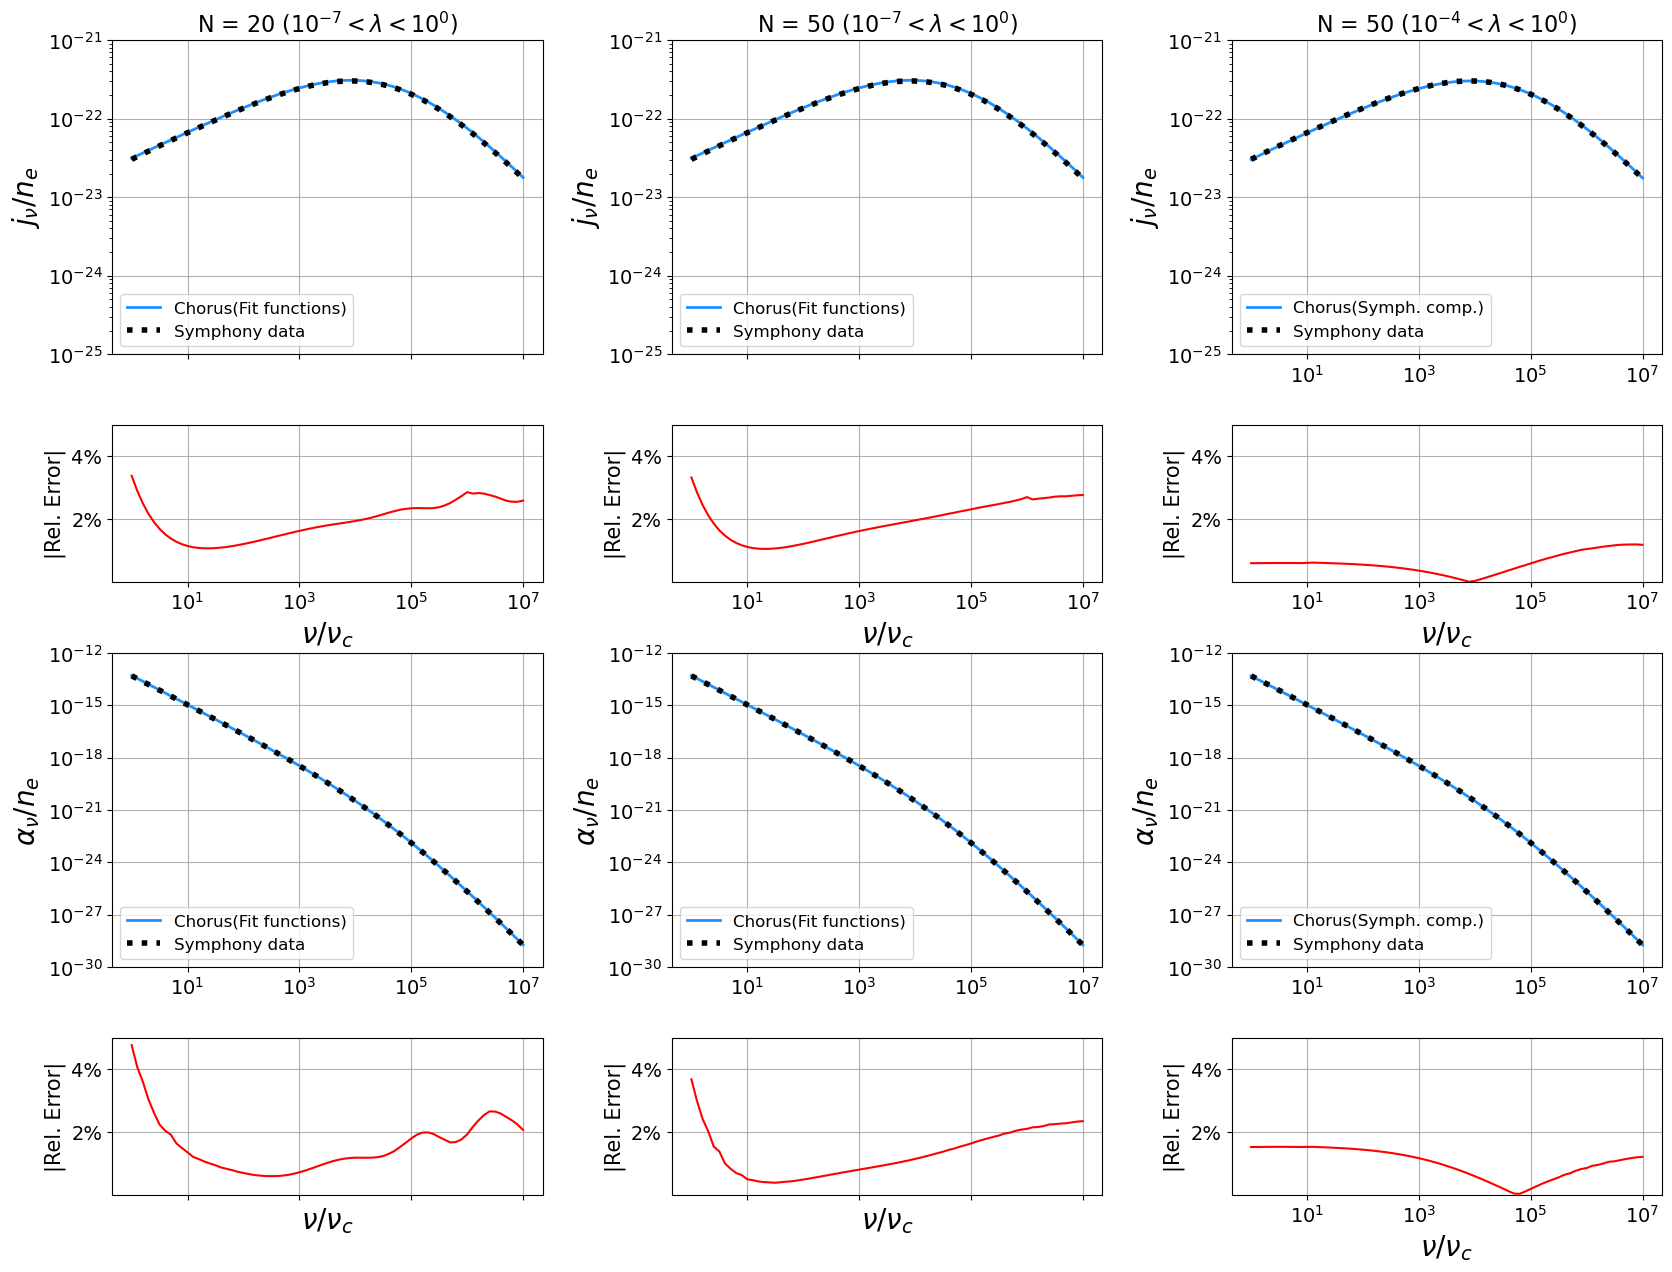

In [9]:
# Create a 4x3 grid of subplots
figure, ax = plt.subplots(4, 3, figsize=(20, 15), sharex=False,
                          gridspec_kw={'height_ratios': [2, 1, 2, 1], 'hspace': 0.3, 'wspace': 0.3})


# Function to compute and plot results for a given N
def plot_1kappa_em_abs(N, column_index, lam_min, use_symp):
    
    # Start the timer
    start_time = time.perf_counter()

    # Set lambda values used in MJ function
    lam = np.logspace(lam_min, 0, N)

    # Gamma values for the kappa and MJ functions
    gamma = np.logspace(0, 7, 300)

    # dgamma necessary followed from the derivation in ISE in the thesis
    dgam = np.diff(gamma)
    dgam = np.append(dgam, dgam[-1])

    # Calculate the matrix A
    A = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            product = f_th(gamma, lam[i]) * f_th(gamma, lam[j]) * dgam
            A[i, j] = np.sum(product)

    # End the timer
    end_time = time.perf_counter()
    print(f"Elapsed time to calculate matrix A for N={N}: {end_time - start_time:.6f} seconds")

    # Start the timer for b_j
    start_time2 = time.perf_counter()

    # Compute vector b_j

    # Compute all three kappa distribution function
    f_kappa = kappa_dist(gamma = gamma, k=3.5, w_k=30)
    # Sum the kappa functions
    f_data = f_kappa

    b = np.zeros(N)
    for i in range(N):
        pro = f_th(gamma, lam[i]) * f_data * dgam
        b[i] = np.sum(pro)

    # Clarabel parameters
    P = sparse.csc_matrix(A)
    q = -b
    G = sparse.csc_matrix(-np.identity(N))
    h = np.zeros(N)
    cones = [clarabel.NonnegativeConeT(N)]
    settings = clarabel.DefaultSettings()
    settings.tol_gap_abs = 0
    settings.tol_gap_rel = 0
    settings.max_iter = 100
    settings.verbose = False

    solver = clarabel.DefaultSolver(P=P, q=q, A=G, b=h, cones=cones, settings=settings)
    solution = solver.solve()
    weights = np.array(solution.x)

    # End the timer
    end_time2 = time.perf_counter()
    print(f"Elapsed time to calculate weights for N={N}: {end_time2 - start_time2:.6f} seconds\n")

    """Frequencies"""
    # Define cyclotron frequency v_c
    v_c = 0.84 * 10**8

    # Generate the ratio v/v_c = [1, 10, 100, 1000, ...]
    ratios = np.logspace(0, 7, 71)  # This will generate [1, 10, 100, 1000, ...,]

    # Calculate corresponding frequencies v = v_c * ratio
    v = v_c * ratios
    
    # Load the CSV file containing emissivity Symphony data
    file_path = r"YOUR FILE PATH HERE(called output_1kappa_EA.csv in git)"

    df = pd.read_csv(file_path)

    #This gets the specific emissivity and absorptivity data from the file
    j_symp1 = df["j_nu"][:71]
    a_symp1 = df["alpha_nu"][:71]

    j_symp = j_symp1
    a_symp = a_symp1 
    
    if use_symp == True:
        # Start the timer
        start_time3 = time.perf_counter()
        print("Emissivity(Symp. components)")
        
        #Computes the total emissivity approximation
        j_appr2 = np.zeros_like(v)
        for i, w in zip(range(1,51,1), weights):
            file_paths = fr"YOUR PATH HERE (folder called \symphony_thermal_components in github)\output_thermal_{i}.csv"
            df = pd.read_csv(file_paths)
            j_symp2 = df["j_nu"]

            j_appr2 += w*j_symp2
            
            """Remove the hashtag below to plot all components in the background"""
            #ax[0,column_index].loglog(v/v_c, w*j_symp2 , alpha = 0.15)
        
        NonNan = ~np.isnan(j_appr2)
        # End the timer
        end_time3 = time.perf_counter()
        print(f"Elapsed time to calculate emissivity for N={N}: {end_time3 - start_time3:.6f} seconds")

        # Plot the results
        ax[0, column_index].loglog(v[NonNan]/v_c, j_appr2[NonNan], label='Chorus(Symph. comp.)', linewidth = 2, color = 'dodgerblue')
        ax[0, column_index].loglog(v/v_c, j_symp, label='Symphony data', linestyle='dotted', linewidth = 4, color = 'black')
        ax[0, column_index].set_ylim(10**-25, 10**-21)
        ax[0, column_index].set_ylabel(r'$j_{\nu} / n_e$', fontsize=20)
        ax[0, column_index].grid()
        ax[0, column_index].legend(fontsize=12, loc = 'lower left')
        ax[0, column_index].tick_params(axis='both', which='major', labelsize=14)

        # Relative error
        rel_error3 = np.abs((j_symp) - j_appr2) / (j_symp) * 100

        ax[1, column_index].plot(v[NonNan]/v_c, rel_error3[NonNan], color='red')
        ax[1, column_index].set_xscale('log')
        ax[1, column_index].set_ylim(10**-5, 0.5*10**1)
        ax[1, column_index].yaxis.set_major_formatter(FuncFormatter(lambda rel_error, _: f'{rel_error:.0f}%'))
        ax[1, column_index].yaxis.tick_left()
        ax[1, column_index].set_ylabel("|Rel. Error|", fontsize=15)
        ax[1, column_index].set_xlabel(r"$\nu / \nu_c$", fontsize=20)
        ax[1, column_index].set_facecolor('white')
        ax[1, column_index].grid()
        ax[1, column_index].tick_params(axis='both', which='major', labelsize=14)
       
        print(f'The median error for N={N} is: {np.nanmedian(rel_error3)}')
        print(f'The max error for N={N} is: {np.max(rel_error3)}')
        print(f'The min error for N={N} is: {np.min(rel_error3)}\n')
        
        # Start the timer
        start_time4 = time.perf_counter()
        #Computes the total emissivity approximation
        print("Absorptivity(Symp. components)")
        a_appr2 = np.zeros_like(v)
        for i, w in zip(range(1,51,1), weights):
            file_paths = fr"YOUR PATH HERE (folder called \symphony_thermal_components in github)\output_thermal_{i}.csv"
            df = pd.read_csv(file_paths)
            a_symp2 = df["alpha_nu"]

            a_appr2 += w*a_symp2
            
            """Remove the hashtag below to plot all components in the background"""
            #ax[2,column_index].loglog(v/v_c, w*a_symp2 , alpha = 0.15)
        
        # End the timer
        end_time4 = time.perf_counter()
        print(f"Elapsed time to calculate absorptivity for N={N}: {end_time4 - start_time4:.6f} seconds")

        NonNan2 = ~np.isnan(a_appr2)
        # Plot the results
        ax[2, column_index].loglog(v[NonNan2]/v_c, a_appr2[NonNan2], label='Chorus(Symph. comp.)', linewidth = 2, color = 'dodgerblue')
        ax[2, column_index].loglog(v/v_c, a_symp, label='Symphony data', linestyle='dotted', linewidth = 4, color = 'black')
        ax[2, column_index].set_ylim(10**-30, 10**-12)
        ax[2, column_index].set_ylabel(r'$\alpha_{\nu} / n_e$', fontsize=20)
        ax[2, column_index].grid()
        ax[2, column_index].legend(fontsize=12, loc = 'lower left')
        ax[2, column_index].tick_params(axis='both', which='major', labelsize=14)

        # Relative error
        rel_error4 = np.abs((a_symp) - a_appr2) / (a_symp) * 100

        ax[3, column_index].plot(v[NonNan2]/v_c, rel_error4[NonNan2], color='red')
        ax[3, column_index].set_xscale('log')
        ax[3, column_index].set_ylim(10**-5, 0.5*10**1)
        ax[3, column_index].yaxis.set_major_formatter(FuncFormatter(lambda rel_error, _: f'{rel_error:.0f}%'))
        ax[3, column_index].yaxis.tick_left()
        ax[3, column_index].set_ylabel("|Rel. Error|", fontsize=15)
        ax[3, column_index].set_xlabel(r"$\nu / \nu_c$", fontsize=20)
        ax[3, column_index].set_facecolor('white')
        ax[3, column_index].grid()
        ax[3, column_index].tick_params(axis='both', which='major', labelsize=14)
        
        
        print(f'The median error for N={N} is: {np.nanmedian(rel_error4)}')
        print(f'The max error for N={N} is: {np.max(rel_error4)}')
        print(f'The min error for N={N} is: {np.min(rel_error4)}\n')
        
    else:
        
        angle = np.pi/3 
        
        # Start the timer
        start_time5 = time.perf_counter()
        print("Emissivity(Fit functions)")
        #Computes the total emissivity approximation
        j_appr = np.zeros_like(v)
        for i, w in zip(range(N), weights):
            j_i = w*j_S_th(n_e = 1, freq = v, freq_c = v_c, lam = lam[i], angle = angle, stokes_param = "I")
            j_appr += j_i
            
            """Remove the hashtag below to plot all components in the background"""
            #ax[0,column_index].loglog(v/v_c, j_i , alpha = 0.15)
        
        end_time5 = time.perf_counter()
        print(f"Elapsed time to calculate emissivity for N={N}: {end_time5 - start_time5:.6f} seconds")

        # Plot the results
        ax[0, column_index].loglog(v/v_c, j_appr, label='Chorus(Fit functions)', linewidth = 2, color = 'dodgerblue')
        ax[0, column_index].loglog(v/v_c, j_symp, label='Symphony data', linestyle='dotted', linewidth = 4, color = 'black')
        ax[0, column_index].set_ylim(10**-25, 10**-21)
        ax[0, column_index].set_ylabel(r'$j_{\nu} / n_e$', fontsize=20)
        ax[0, column_index].grid()
        ax[0, column_index].legend(fontsize=12, loc = 'lower left')
        ax[0, column_index].tick_params(axis='both', which='major', labelsize=14)

        # Relative error
        rel_error = np.abs((j_symp) - j_appr) / (j_symp) * 100

        ax[1, column_index].plot(v/v_c, rel_error, color='red')
        ax[1, column_index].set_xscale('log')
        ax[1, column_index].set_ylim(10**-5, 0.5*10**1)
        ax[1, column_index].yaxis.set_major_formatter(FuncFormatter(lambda rel_error, _: f'{rel_error:.0f}%'))
        ax[1, column_index].yaxis.tick_left()
        ax[1, column_index].set_ylabel("|Rel. Error|", fontsize=15)
        ax[1, column_index].set_xlabel(r"$\nu / \nu_c$", fontsize=20)
        ax[1, column_index].set_facecolor('white')
        ax[1, column_index].grid()
        ax[1, column_index].tick_params(axis='both', which='major', labelsize=14)
        
        print(f'The median error for N={N} is: {np.median(rel_error)}')
        print(f'The max error for N={N} is: {np.max(rel_error)}')
        print(f'The min error for N={N} is: {np.min(rel_error)}\n')

        
        # Start the timer
        start_time6 = time.perf_counter()
        #Computes the total emissivity approximation
        print("Absorptivity(Fit functions)")
        
        #Computes the total aborptivity approximation
        a_appr = np.zeros_like(v)
        for i, w in zip(range(N), weights):
            a_i = w*a_S_th(n_e = 1, freq = v, freq_c = v_c, lam = lam[i], angle = angle, stokes_param = "I")
            a_appr += a_i
            
            """Remove the hashtag below to plot all components in the background"""
            #ax[2,column_index].loglog(v/v_c, a_i , alpha = 0.15)

        # End the timer
        end_time6 = time.perf_counter()
        print(f"Elapsed time to calculate absorptivity for N={N}: {end_time6 - start_time6:.6f} seconds")

        # Plot the results
        ax[2, column_index].loglog(v/v_c, a_appr, label='Chorus(Fit functions)', linewidth = 2, color = 'dodgerblue')
        ax[2, column_index].loglog(v/v_c, a_symp, label='Symphony data', linestyle='dotted', linewidth = 4, color = 'black')
        ax[2, column_index].set_ylim(10**-30, 10**-12)
        ax[2, column_index].set_ylabel(r'$\alpha_{\nu} / n_e$', fontsize=20)
        ax[2, column_index].grid()
        ax[2, column_index].legend(fontsize=12, loc = 'lower left')
        ax[2, column_index].tick_params(axis='both', which='major', labelsize=14)

        # Relative error
        rel_error2 = np.abs((a_symp) - a_appr) / (a_symp) * 100

        ax[3, column_index].plot(v/v_c, rel_error2, color='red')
        ax[3, column_index].set_xscale('log')
        ax[3, column_index].set_ylim(10**-5, 0.5*10**1)
        ax[3, column_index].yaxis.set_major_formatter(FuncFormatter(lambda rel_error, _: f'{rel_error:.0f}%'))
        ax[3, column_index].yaxis.tick_left()
        ax[3, column_index].set_ylabel("|Rel. Error|", fontsize=15)
        ax[3, column_index].set_xlabel(r"$\nu / \nu_c$", fontsize=20)
        ax[3, column_index].set_facecolor('white')
        ax[3, column_index].grid()
        ax[3, column_index].tick_params(axis='both', which='major', labelsize=14)

        print(f'The median error for N={N} is: {np.median(rel_error2)}')
        print(f'The max error for N={N} is: {np.max(rel_error2)}')
        print(f'The min error for N={N} is: {np.min(rel_error2)}\n')

# Share x-axis only within the top two and bottom two rows per column
for col in range(3):  # Loop over both columns
    ax[0, col].sharex(ax[1, col])  # Top two share x-axis
    ax[2, col].sharex(ax[3, col])  # Bottom two share x-axis

# Hide x-tick labels for the upper subplots in each group
for row in [0, 3]:  # Only the first in each pair (0,1) and (2,3)
    for col in range(2):
        ax[row, col].tick_params(labelbottom=False)  # Hide x-tick labels

# Compute and plot results for N = 50 (left column)
plot_1kappa_em_abs(N=20, column_index=0, lam_min=-7, use_symp = False)

# Compute and plot results for N = 20 (right column)
plot_1kappa_em_abs(N=50, column_index=1, lam_min=-7, use_symp = False)

# Compute and plot results for N = 20 (right column)
plot_1kappa_em_abs(N=50, column_index=2, lam_min=-4, use_symp = True)


# Set plot titles
ax[0, 2].set_title("N = 50 ($10^{-4} < \lambda < 10^0$)", fontsize=16)
ax[0, 1].set_title("N = 50 ($10^{-7} < \lambda < 10^0$)", fontsize=16)
ax[0, 0].set_title("N = 20 ($10^{-7} < \lambda < 10^0$)", fontsize=16)

plt.show()



### Emissivity and absorptivity for approximation of 3 kappa

Elapsed time to calculate matrix A for N=20: 0.010422 seconds
Elapsed time to calculate weights for N=20: 0.001963 seconds

Emissivity(Fit Functions)
Elapsed time to calculate emissivity for N=20: 0.000385 seconds
The median error for N=20 is: 2.0944837494207085
The max error for N=20 is: 5.707909368437878
The min error for N=20 is: 0.8423588770689976

Absorptivity(Fit functions)
Elapsed time to calculate absorptivity for N=20: 0.000572 seconds
The median error for N=20 is: 1.880100914128603
The max error for N=20 is: 6.289522225159291
The min error for N=20 is: 0.05083576561234775

Elapsed time to calculate matrix A for N=50: 0.064597 seconds
Elapsed time to calculate weights for N=50: 0.006826 seconds

Emissivity(Fit Functions)
Elapsed time to calculate emissivity for N=50: 0.000874 seconds
The median error for N=50 is: 2.0884502366466045
The max error for N=50 is: 5.5978877627036105
The min error for N=50 is: 0.8330158817211544

Absorptivity(Fit functions)
Elapsed time to calculate 

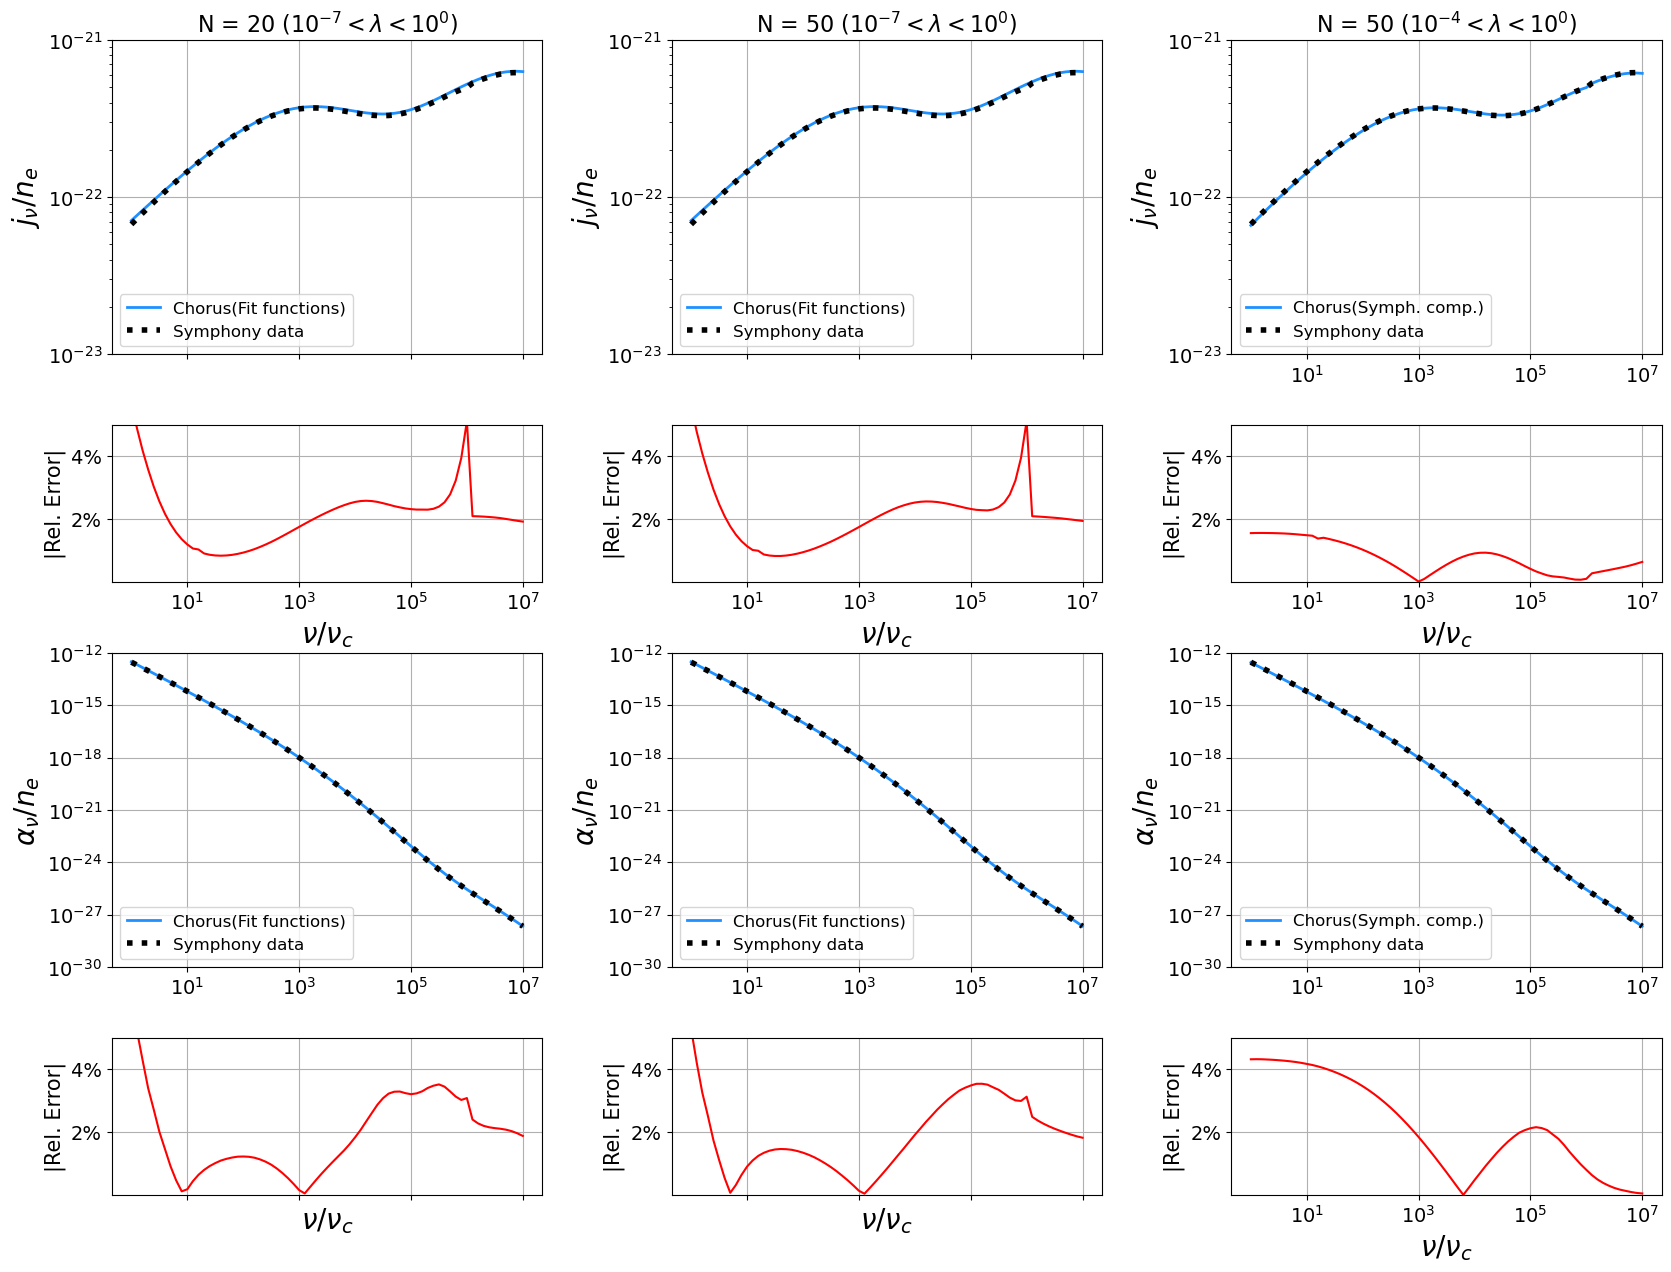

In [10]:
# Create a 4x3 grid of subplots
figure, ax = plt.subplots(4, 3, figsize=(20, 15), sharex=False,
                          gridspec_kw={'height_ratios': [2, 1, 2, 1], 'hspace': 0.3, 'wspace': 0.3})


# Function to compute and plot results for a given N
def plot_3kappa_em_abs(N, column_index, lam_min, use_symp):
    
    # Start the timer
    start_time = time.perf_counter()

    # Set lambda values used in MJ function
    lam = np.logspace(lam_min, 0, N)

    # Gamma values for the kappa and MJ functions
    gamma = np.logspace(0, 7, 300)

    # dgamma necessary followed from the derivation in ISE in the thesis
    dgam = np.diff(gamma)
    dgam = np.append(dgam, dgam[-1])

    # Calculate the matrix A
    A = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            product = f_th(gamma, lam[i]) * f_th(gamma, lam[j]) * dgam
            A[i, j] = np.sum(product)

    # End the timer
    end_time = time.perf_counter()
    print(f"Elapsed time to calculate matrix A for N={N}: {end_time - start_time:.6f} seconds")

    # Start the timer for b_j
    start_time2 = time.perf_counter()

    # Compute vector b_j

    # Compute all three kappa distribution function
    f_kappa = kappa_dist(gamma = gamma, k=3.5, w_k=10)
    f_test = kappa_dist(gamma = gamma, k=6, w_k=1000)
    f_test2 = kappa_dist(gamma = gamma, k=4, w_k=2000)

    # Sum the kappa functions
    f_data = f_kappa + f_test + f_test2

    b = np.zeros(N)
    for i in range(N):
        pro = f_th(gamma, lam[i]) * f_data * dgam
        b[i] = np.sum(pro)

    # Clarabel parameters
    P = sparse.csc_matrix(A)
    q = -b
    G = sparse.csc_matrix(-np.identity(N))
    h = np.zeros(N)
    cones = [clarabel.NonnegativeConeT(N)]
    settings = clarabel.DefaultSettings()
    settings.tol_gap_abs = 0
    settings.tol_gap_rel = 0
    settings.max_iter = 100
    settings.verbose = False

    solver = clarabel.DefaultSolver(P=P, q=q, A=G, b=h, cones=cones, settings=settings)
    solution = solver.solve()
    weights = np.array(solution.x)

    # End the timer
    end_time2 = time.perf_counter()
    print(f"Elapsed time to calculate weights for N={N}: {end_time2 - start_time2:.6f} seconds\n")

    """Frequencies"""
    # Define cyclotron frequency v_c
    v_c = 0.84 * 10**8

    # Generate the ratio v/v_c = [1, 10, 100, 1000, ...]
    ratios = np.logspace(0, 7, 71)  # This will generate [1, 10, 100, 1000, ...,]

    # Calculate corresponding frequencies v = v_c * ratio
    v = v_c * ratios
    
    # Load the CSV file containing emissivity Symphony data
    file_path = r"YOUR PATH HERE (called output_3kappa_first_EA.csv in github)"
    file_path2 = r"YOUR PATH HERE (called output_3kappa_second_EA.csv in github)"
    file_path3 = r"YOUR PATH HERE (called output_3kappa_third_EA.csv in github)"
    
    df = pd.read_csv(file_path)
    df2 = pd.read_csv(file_path2)
    df3 = pd.read_csv(file_path3)
    
    #This gets the specific emissivity and absorptivity data from the file
    j_symp1 = df["j_nu"][:71]
    a_symp1 = df["alpha_nu"][:71]
    
    j_symp2 = df2["j_nu"][:71]
    a_symp2 = df2["alpha_nu"][:71]
    
    j_symp3 = df3["j_nu"][:71]
    a_symp3 = df3["alpha_nu"][:71]
    
    j_symp = j_symp1 + j_symp2 + j_symp3
    a_symp = a_symp1 + a_symp2 + a_symp3
    
    if use_symp == True:
        # Start the timer
        start_time3 = time.perf_counter()
        print("Emissivity(Symp. components)")
        
        #Computes the total emissivity approximation
        j_appr2 = np.zeros_like(v)
        for i, w in zip(range(1,51,1), weights):
            file_paths = fr"YOUR PATH HERE (folder called \symphony_thermal_components in github)\output_thermal_{i}.csv"
            df = pd.read_csv(file_paths)
            j_symp2 = df["j_nu"]

            j_appr2 += w*j_symp2
            
            """Remove the hashtag below to plot all components in the background"""
            #ax[0,column_index].loglog(v/v_c, w*j_symp2 , alpha = 0.15)
            
        # End the timer
        end_time3 = time.perf_counter()
        print(f"Elapsed time to calculate emissivity for N={N}: {end_time3 - start_time3:.6f} seconds")

        NonNan = ~np.isnan(j_appr2)

        # Plot the results
        ax[0, column_index].loglog(v[NonNan]/v_c, j_appr2[NonNan], label='Chorus(Symph. comp.)', linewidth = 2, color = 'dodgerblue')
        ax[0, column_index].loglog(v/v_c, j_symp, label='Symphony data', linestyle='dotted', linewidth = 4, color = 'black')
        ax[0, column_index].set_ylim(10**-23, 10**-21)
        ax[0, column_index].set_ylabel(r'$j_{\nu} / n_e$', fontsize=20)
        ax[0, column_index].grid()
        ax[0, column_index].legend(fontsize=12, loc = 'lower left')
        ax[0, column_index].tick_params(axis='both', which='major', labelsize=14)

        # Relative error
        rel_error3 = np.abs((j_symp) - j_appr2) / (j_symp) * 100

        ax[1, column_index].plot(v[NonNan]/v_c, rel_error3[NonNan], color='red')
        ax[1, column_index].set_xscale('log')
        ax[1, column_index].set_ylim(10**-5, 0.5*10**1)
        ax[1, column_index].yaxis.set_major_formatter(FuncFormatter(lambda rel_error, _: f'{rel_error:.0f}%'))
        ax[1, column_index].yaxis.tick_left()
        ax[1, column_index].set_ylabel("|Rel. Error|", fontsize=15)
        ax[1, column_index].set_xlabel(r"$\nu / \nu_c$", fontsize=20)
        ax[1, column_index].set_facecolor('white')
        ax[1, column_index].grid()
        ax[1, column_index].tick_params(axis='both', which='major', labelsize=14)

        print(f'The median error for N={N} is: {np.nanmedian(rel_error3)}')
        print(f'The max error for N={N} is: {np.max(rel_error3)}')
        print(f'The min error for N={N} is: {np.min(rel_error3)}\n')
        
        #Computes the total emissivity approximation
        
        # Start the timer
        start_time4 = time.perf_counter()
        #Computes the total emissivity approximation
        print("Absorptivity(Symp. components)")
        
        a_appr2 = np.zeros_like(v)
        for i, w in zip(range(1,51,1), weights):
            file_paths = fr"YOUR PATH HERE (folder called \symphony_thermal_components in github)\output_thermal_{i}.csv"
            df = pd.read_csv(file_paths)
            a_symp2 = df["alpha_nu"]

            a_appr2 += w*a_symp2
            
            """Remove the hashtag below to plot all components in the background"""
            #ax[2,column_index].loglog(v/v_c, w*a_symp2 , alpha = 0.15)
            
        # End the timer
        end_time4 = time.perf_counter()
        print(f"Elapsed time to calculate absorptivity for N={N}: {end_time4 - start_time4:.6f} seconds")

        NonNan2 = ~np.isnan(a_appr2)
        # Plot the results
        ax[2, column_index].loglog(v[NonNan2]/v_c, a_appr2[NonNan2], label='Chorus(Symph. comp.)', linewidth = 2, color = 'dodgerblue')
        ax[2, column_index].loglog(v/v_c, a_symp, label='Symphony data', linestyle='dotted', linewidth = 4, color = 'black')
        ax[2, column_index].set_ylim(10**-30, 10**-12)
        ax[2, column_index].set_ylabel(r'$\alpha_{\nu} / n_e$', fontsize=20)
        ax[2, column_index].grid()
        ax[2, column_index].legend(fontsize=12, loc = 'lower left')
        ax[2, column_index].tick_params(axis='both', which='major', labelsize=14)

        # Relative error
        rel_error4 = np.abs((a_symp) - a_appr2) / (a_symp) * 100

        ax[3, column_index].plot(v[NonNan2]/v_c, rel_error4[NonNan2], color='red')
        ax[3, column_index].set_xscale('log')
        ax[3, column_index].set_ylim(10**-5, 0.5*10**1)
        ax[3, column_index].yaxis.set_major_formatter(FuncFormatter(lambda rel_error, _: f'{rel_error:.0f}%'))
        ax[3, column_index].yaxis.tick_left()
        ax[3, column_index].set_ylabel("|Rel. Error|", fontsize=15)
        ax[3, column_index].set_xlabel(r"$\nu / \nu_c$", fontsize=20)
        ax[3, column_index].set_facecolor('white')
        ax[3, column_index].grid()
        ax[3, column_index].tick_params(axis='both', which='major', labelsize=14)
        
        print(f'The median error for N={N} is: {np.nanmedian(rel_error4)}')
        print(f'The max error for N={N} is: {np.max(rel_error4)}')
        print(f'The min error for N={N} is: {np.min(rel_error4)}\n')
        
    else:
        
        angle = np.pi/3 
        
        # Start the timer
        start_time5 = time.perf_counter()
        print("Emissivity(Fit Functions)")
        
        #Computes the total emissivity approximation
        j_appr = np.zeros_like(v)
        for i, w in zip(range(N), weights):
            j_i = w*j_S_th(n_e = 1, freq = v, freq_c = v_c, lam = lam[i], angle = angle, stokes_param = "I")
            j_appr += j_i
            
            """Remove the hashtag below to plot all components in the background"""
            #ax[0,column_index].loglog(v/v_c, j_i , alpha = 0.15)
            
        end_time5 = time.perf_counter()
        print(f"Elapsed time to calculate emissivity for N={N}: {end_time5 - start_time5:.6f} seconds")

        # Plot the results
        ax[0, column_index].loglog(v/v_c, j_appr, label='Chorus(Fit functions)', linewidth = 2, color = 'dodgerblue')
        ax[0, column_index].loglog(v/v_c, j_symp, label='Symphony data', linestyle='dotted', linewidth = 4, color = 'black')
        ax[0, column_index].set_ylim(10**-23, 10**-21)
        ax[0, column_index].set_ylabel(r'$j_{\nu} / n_e$', fontsize=20)
        ax[0, column_index].grid()
        ax[0, column_index].legend(fontsize=12, loc = 'lower left')
        ax[0, column_index].tick_params(axis='both', which='major', labelsize=14)

        # Relative error
        rel_error = np.abs((j_symp) - j_appr) / (j_symp) * 100

        ax[1, column_index].plot(v/v_c, rel_error, color='red')
        ax[1, column_index].set_xscale('log')
        ax[1, column_index].set_ylim(10**-5, 0.5*10**1)
        ax[1, column_index].yaxis.set_major_formatter(FuncFormatter(lambda rel_error, _: f'{rel_error:.0f}%'))
        ax[1, column_index].yaxis.tick_left()
        ax[1, column_index].set_ylabel("|Rel. Error|", fontsize=15)
        ax[1, column_index].set_xlabel(r"$\nu / \nu_c$", fontsize=20)
        ax[1, column_index].set_facecolor('white')
        ax[1, column_index].grid()
        ax[1, column_index].tick_params(axis='both', which='major', labelsize=14)

        print(f'The median error for N={N} is: {np.nanmedian(rel_error)}')
        print(f'The max error for N={N} is: {np.max(rel_error)}')
        print(f'The min error for N={N} is: {np.min(rel_error)}\n')


        #Computes the total aborptivity approximation
        
        # Start the timer
        start_time6 = time.perf_counter()
        #Computes the total emissivity approximation
        print("Absorptivity(Fit functions)")
        
        a_appr = np.zeros_like(v)
        for i, w in zip(range(N), weights):
            a_i = w*a_S_th(n_e = 1, freq = v, freq_c = v_c, lam = lam[i], angle = angle, stokes_param = "I")
            a_appr += a_i
            
            """Remove the hashtag below to plot all components in the background"""
            #ax[2,column_index].loglog(v/v_c, a_i , alpha = 0.15)

        # End the timer
        end_time6 = time.perf_counter()
        print(f"Elapsed time to calculate absorptivity for N={N}: {end_time6 - start_time6:.6f} seconds")


        # Plot the results
        ax[2, column_index].loglog(v/v_c, a_appr, label='Chorus(Fit functions)', linewidth = 2, color = 'dodgerblue')
        ax[2, column_index].loglog(v/v_c, a_symp, label='Symphony data', linestyle='dotted', linewidth = 4, color = 'black')
        ax[2, column_index].set_ylim(10**-30, 10**-12)
        ax[2, column_index].set_ylabel(r'$\alpha_{\nu} / n_e$', fontsize=20)
        ax[2, column_index].grid()
        ax[2, column_index].legend(fontsize=12, loc = 'lower left')
        ax[2, column_index].tick_params(axis='both', which='major', labelsize=14)

        # Relative error
        rel_error2 = np.abs((a_symp) - a_appr) / (a_symp) * 100

        ax[3, column_index].plot(v/v_c, rel_error2, color='red')
        ax[3, column_index].set_xscale('log')
        ax[3, column_index].set_ylim(10**-5, 0.5*10**1)
        ax[3, column_index].yaxis.set_major_formatter(FuncFormatter(lambda rel_error, _: f'{rel_error:.0f}%'))
        ax[3, column_index].yaxis.tick_left()
        ax[3, column_index].set_ylabel("|Rel. Error|", fontsize=15)
        ax[3, column_index].set_xlabel(r"$\nu / \nu_c$", fontsize=20)
        ax[3, column_index].set_facecolor('white')
        ax[3, column_index].grid()
        ax[3, column_index].tick_params(axis='both', which='major', labelsize=14)

        print(f'The median error for N={N} is: {np.nanmedian(rel_error2)}')
        print(f'The max error for N={N} is: {np.max(rel_error2)}')
        print(f'The min error for N={N} is: {np.min(rel_error2)}\n')
        
# Share x-axis only within the top two and bottom two rows per column
for col in range(3):  # Loop over both columns
    ax[0, col].sharex(ax[1, col])  # Top two share x-axis
    ax[2, col].sharex(ax[3, col])  # Bottom two share x-axis

# Hide x-tick labels for the upper subplots in each group
for row in [0, 3]:  # Only the first in each pair (0,1) and (2,3)
    for col in range(2):
        ax[row, col].tick_params(labelbottom=False)  # Hide x-tick labels

# Compute and plot results for N = 50 (left column)
plot_3kappa_em_abs(N=20, column_index=0, lam_min=-7, use_symp = False)

# Compute and plot results for N = 20 (right column)
plot_3kappa_em_abs(N=50, column_index=1, lam_min=-7, use_symp = False)

# Compute and plot results for N = 20 (right column)
plot_3kappa_em_abs(N=50, column_index=2, lam_min=-4, use_symp = True)


# Set plot titles
ax[0, 2].set_title("N = 50 ($10^{-4} < \lambda < 10^0$)", fontsize=16)
ax[0, 1].set_title("N = 50 ($10^{-7} < \lambda < 10^0$)", fontsize=16)
ax[0, 0].set_title("N = 20 ($10^{-7} < \lambda < 10^0$)", fontsize=16)

plt.show()



## Rotativity Q for approximation of 1 kappa

Elapsed time to calculate matrix A for N=20: 0.010281 seconds
Elapsed time to calculate weights for N=20: 0.001056 seconds
Elapsed time to calculate rhoQ for N=20: 0.001080 seconds
The median error for N=20 is: 7.449758393203816
The max error for N=20 is: 49.32315329554617
The min error for N=20 is: 0.26951197200170984

Elapsed time to calculate matrix A for N=50: 0.064260 seconds
Elapsed time to calculate weights for N=50: 0.006720 seconds
Elapsed time to calculate rhoQ for N=50: 0.002440 seconds
The median error for N=50 is: 8.181383930331112
The max error for N=50 is: 83.74091070766342
The min error for N=50 is: 0.1307503300128877



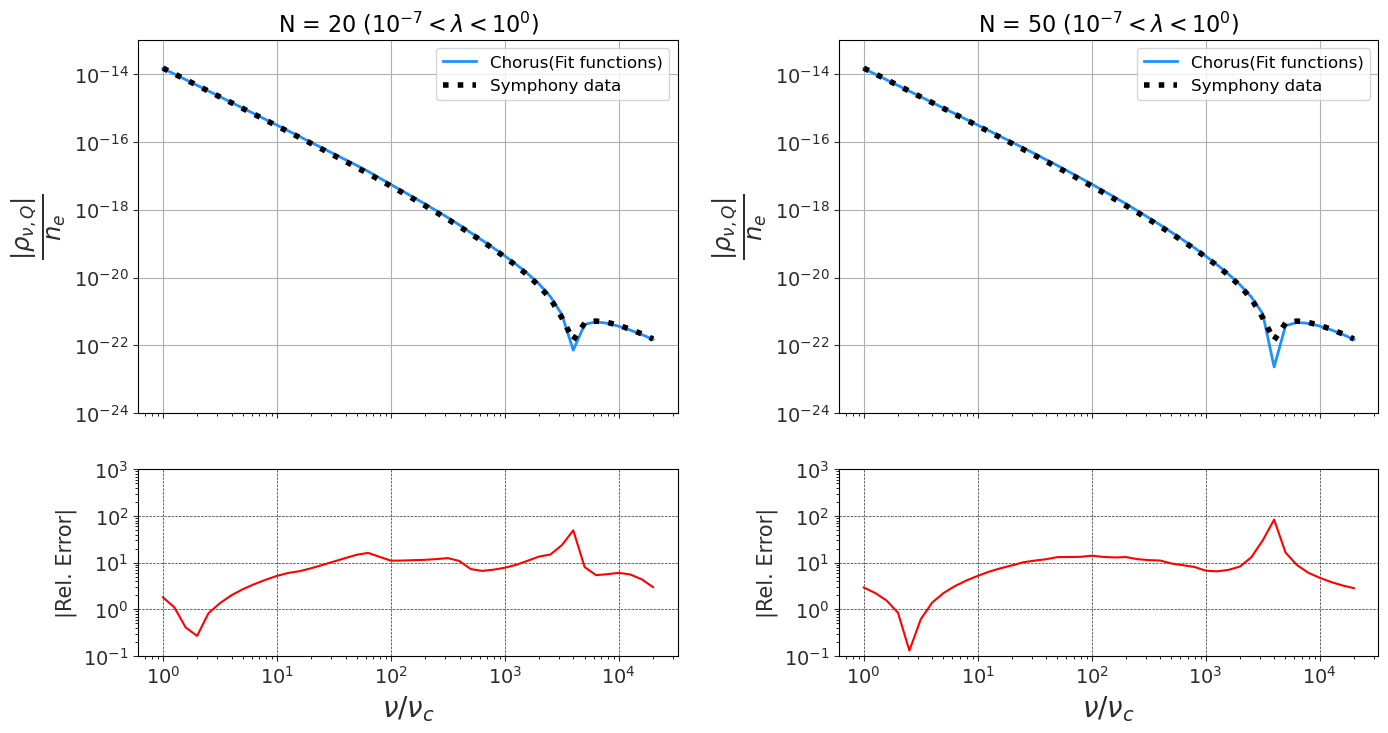

In [11]:
# Create a 2x2 grid of subplots
figure, ax = plt.subplots(2, 2, figsize=(16, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1], 'hspace': 0.2, 'wspace': 0.3})

# Function to compute and plot results for a given N
def plot_results_rhoQ(N, column_index):
    # Start the timer
    start_time = time.perf_counter()

    # Set lambda values used in MJ function
    lam = np.logspace(-7, 0, N)

    # Gamma values for the kappa and MJ functions
    gamma = np.logspace(0, 7, 300)

    # dgamma necessary followed from the derivation in ISE in the thesis
    dgam = np.diff(gamma)
    dgam = np.append(dgam, dgam[-1])

    # Calculate the matrix A
    A = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            product = f_th(gamma, lam[i]) * f_th(gamma, lam[j]) * dgam
            A[i, j] = np.sum(product)

    # End the timer
    end_time = time.perf_counter()
    print(f"Elapsed time to calculate matrix A for N={N}: {end_time - start_time:.6f} seconds")

    # Start the timer for b_j
    start_time = time.perf_counter()

    # Compute vector b_j
    w_k = 30
    k = 3.5
    lam_min = 0
    f_kappa = kappa_dist(gamma=gamma, k=k, w_k=w_k)
    f_data = f_kappa

    b = np.zeros(N)
    for i in range(N):
        pro = f_th(gamma, lam[i]) * f_data * dgam
        b[i] = np.sum(pro)

    # Clarabel parameters
    P = sparse.csc_matrix(A)
    q = -b
    G = sparse.csc_matrix(-np.identity(N))
    h = np.zeros(N)
    cones = [clarabel.NonnegativeConeT(N)]
    settings = clarabel.DefaultSettings()
    settings.tol_gap_abs = 0
    settings.tol_gap_rel = 0
    settings.max_iter = 100
    settings.verbose = False

    solver = clarabel.DefaultSolver(P=P, q=q, A=G, b=h, cones=cones, settings=settings)
    solution = solver.solve()
    weights = np.array(solution.x)

    # End the timer
    end_time = time.perf_counter()
    print(f"Elapsed time to calculate weights for N={N}: {end_time - start_time:.6f} seconds")

    # Compute the approximations
    f_appr = np.zeros_like(gamma)
    for i, w in zip(range(N), weights):
        f_i = w * f_th(gamma, lam[i])
        f_appr += f_i
    
    #Frequencies
    # Define v_c
    v_c = 0.84 * 10**8

    # Generate the ratio v/v_c = [1, 10, 100, 1000, ...]
    ratios = np.logspace(np.log10(1), np.log10(19952.620000), 44)  # This will generate [1, 10, 100, 1000, ...,]

    # Calculate corresponding frequencies v = v_c * ratio
    v = v_c * ratios

    dv = np.diff(v/v_c)
    dv = np.append(dv/v_c, dv[-1])

    #Lambda
    lam = np.logspace(-7, 0, N)

    dlam = np.diff(lam)
    dlam = np.append(dlam, dlam[-1])

    we_norm = weights/(np.sum(weights))

    #Angle (60 Deg)
    angle = (1/3)*np.pi
    
    # Start the timer for b_j
    start_time2 = time.perf_counter()

    r_appr = np.zeros_like(v)
    for i, wn in zip(range(N), we_norm):
        r_i = wn*rho_Q_th(n_e = 1, freq = v, freq_c = v_c, lam = lam[i], angle = angle)
        r_appr += r_i
        
        """Remove the hashtag below to plot all components in the background"""
        #ax[0, column_index].loglog(v/v_c, np.abs(r_i) , alpha = 0.15)

    # End the timer
    end_time2 = time.perf_counter()
    print(f"Elapsed time to calculate rhoQ for N={N}: {end_time2 - start_time2:.6f} seconds")

    #Symphony
    #Load the CSV
    file_path = fr"YOUR PATH HERE (called output_rhoQ.csv in github)"
    df = pd.read_csv(file_path)

    # Rename columns if necessary
    if "nu / nu_c" in df.columns:
        df.rename(columns={"nu / nu_c": "nu/nu_c"}, inplace=True)
    r_symp = df["rho_Q"][:-1]
    
    # Plot the results
    ax[0, column_index].loglog(v/v_c, np.abs(r_appr), label='Chorus(Fit functions)', linewidth = 2, color = 'dodgerblue')
    ax[0, column_index].loglog(v/v_c, np.abs(r_symp), label='Symphony data', linestyle='dotted', linewidth = 4, color = 'black')
    ax[0, column_index].set_ylim(10**-24, 10**-13)
    ax[0, column_index].set_ylabel(r'$\frac{|\rho_{\nu, Q}|}{n_e}$', fontsize=25, color='#2c2c2c')
    ax[0, column_index].grid()
    ax[0, column_index].legend(fontsize=12)
    ax[0, column_index].tick_params(axis='both', which='major', labelsize=14, colors='#2c2c2c')
    
    # Relative error
    rel_error = np.abs((r_symp - r_appr) / (r_symp)) * 100
    ax[1, column_index].loglog(v/v_c, rel_error, color='red')
    ax[1, column_index].set_xscale('log')
    ax[1, column_index].set_ylim(10**-1, 10*10**2)
    #ax[1, column_index].yaxis.set_major_formatter(FuncFormatter(lambda rel_error, _: f'{rel_error:.0f}%'))
    ax[1, column_index].yaxis.tick_left()
    ax[1, column_index].set_xlabel(r'$\nu / \nu_c$', fontsize=20, color='#2c2c2c')
    ax[1, column_index].set_ylabel(r'|Rel. Error|', fontsize=15, color='#2c2c2c')
    ax[1, column_index].set_facecolor('white')
    ax[1, column_index].grid(color='#2c2c2c', linestyle='--', linewidth=0.5)
    ax[1, column_index].tick_params(axis='both', which='major', labelsize=14, colors='#2c2c2c')
    
    print(f'The median error for N={N} is: {np.median(rel_error)}')
    print(f'The max error for N={N} is: {np.max(rel_error)}')
    print(f'The min error for N={N} is: {np.min(rel_error)}\n')

# Compute and plot results for N = 50 (left column)
plot_results_rhoQ(N=20, column_index=0)

# Compute and plot results for N = 20 (right column)
plot_results_rhoQ(N=50, column_index=1)

# Set plot titles
ax[0, 0].set_title("N = 20 ($10^{-7} < \lambda < 10^0$)", fontsize=16)
ax[0, 1].set_title("N = 50 ($10^{-7} < \lambda < 10^0$)", fontsize=16)

plt.show()
